<h1 style="text-align: center;">KIDNEY DISEASE DS50 PROJECT</h1>


<center>

<img src="https://ausmed-images.s3.ap-southeast-2.amazonaws.com/ausmed.com/ausmed-articles/20220502_cover.jpg" alt="Reins Malades">

</center>



<div style="text-align: center;">
    <p>Dataset: kaggle chronic Kidney disease dataset<br>
       Last modification date: 15/06/2024</p>
</div>


Authors:
- Gabriella NDJAMBA BATOMEN
- Muna Ayuni BINTI MAHATHIR
- Rawan TRABOULSI
- Kawtar DABRAIM
- Hajar ADNANI


<div class="toc">
  <h1>Table of Contents</h1>
  <ul>
    <li><a href="#data-exploration">Data Understanding</a></li>
    <li><a href="#data-preprocessing">Data Preprocessing</a></li>
    <li><a href="#EDA">EDA</a></li>
    <li><a href="#feature-selection-engineering">Feature Selection</a></li>
    <li><a href="#model-selection-and-training">Model Training and Prediction</a></li>
    <li><a href="#model-evaluation-and-tuning">Model Evaluation and Comparison</a></li>
  </ul>
</div>


### Library imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import matplotlib.style as style

from scipy.stats import norm, skew, chi2_contingency, f_oneway
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
#Uploading the kidney disease dataset

df = pd.read_csv('kidney_disease.csv')


## Data Understanding


In [3]:
display(df)

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [4]:
df.describe(include='all')

id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         396         396  ...  330   295   
unique         NaN       2       2           2           2  ...   44    92   
top            NaN  normal  normal  notpresent  notpresent  ...   41  9800   
freq           NaN     201     259         354         374  ...   21    11   
mean      0.450142     NaN     NaN         NaN         NaN  ...  NaN   NaN   
std       1.099191     NaN     NaN         NaN         NaN  ...  NaN   NaN   
min       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
25%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
50%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
75%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
max       5.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   

         rc  htn   dm  cad appet   pe  ane classification  
count   270  398  398  398   399  399  399            400  
unique   49    2    5    3     2    2    2              3  
top     5.2   no   no   no  good   no   no            ckd  
freq     18  251  258  362   317  323  339            248  
mean    NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
std     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
min     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
25%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
50%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
75%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
max     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  

[11 rows x 26 columns]

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:

# Renaming columns for better understanding

df = df.rename(columns={
    'bp': 'blood pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'class'
})


In [7]:
df.columns


Index(['id', 'age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

## Data preprocessing

Step 1: Dropping unneccessary columns (id)

In [9]:
df.drop('id', axis = 1, inplace = True)

In [10]:
df.head()

age  blood pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           yes                yes                      no     good   
1            no                 no                      no     good   
2            no                yes                      no     poor   
3           yes                 no                      no     poor   
4            no                 no                      no     good   

  pedal_edema anemia class  
0          no     no   ckd  
1          no     no   ckd  
2          no    yes   ckd  
3         yes    yes   ckd  
4          no     no   ckd  

[5 rows x 25 columns]

Step 2: Correcting incorrect data

It appears that the columns 'packed cell volume', 'white blood cell count', and 'red blood cell count' are currently stored as object type, but they should be converted to numerical data types.

In [11]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
df.dtypes

age                        float64
blood pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [13]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [15]:
num_cols

['age',
 'blood pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [17]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd'})

In [18]:
#Verifying incorrect values have been replaced

for col in cat_cols:
    print(f"{col} has {df[col].unique()} categories\n")

red_blood_cells has [nan 'normal' 'abnormal'] categories

pus_cell has ['normal' 'abnormal' nan] categories

pus_cell_clumps has ['notpresent' 'present' nan] categories

bacteria has ['notpresent' 'present' nan] categories

hypertension has ['yes' 'no' nan] categories

diabetes_mellitus has ['yes' 'no' nan] categories

coronary_artery_disease has ['no' 'yes' nan] categories

appetite has ['good' 'poor' nan] categories

pedal_edema has ['no' 'yes' nan] categories

anemia has ['no' 'yes' nan] categories

class has ['ckd' 'notckd'] categories



In [19]:
for i in df.columns:
    print("unique values in {}:\n".format(i),df[i].unique())

unique values in age:
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in blood pressure:
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in specific_gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in red_blood_cells:
 [nan 'normal' 'abnormal']
unique values in pus_cell:
 ['normal' 'abnormal' nan]
unique values in pus_cell_clumps:
 ['notpresent' 'present' nan]
unique values in bacteria:
 ['notpresent' 'present' nan]
unique values in blood_glucose_random:
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108

Step 3: Checking for duplicates

In [20]:
print("Number of duplicates in dataset:", df.duplicated().sum())


Number of duplicates in dataset: 0


Step 4: Handling missing values / feature encoding

Before handling missing values, we first check the correlation to better understand our data 

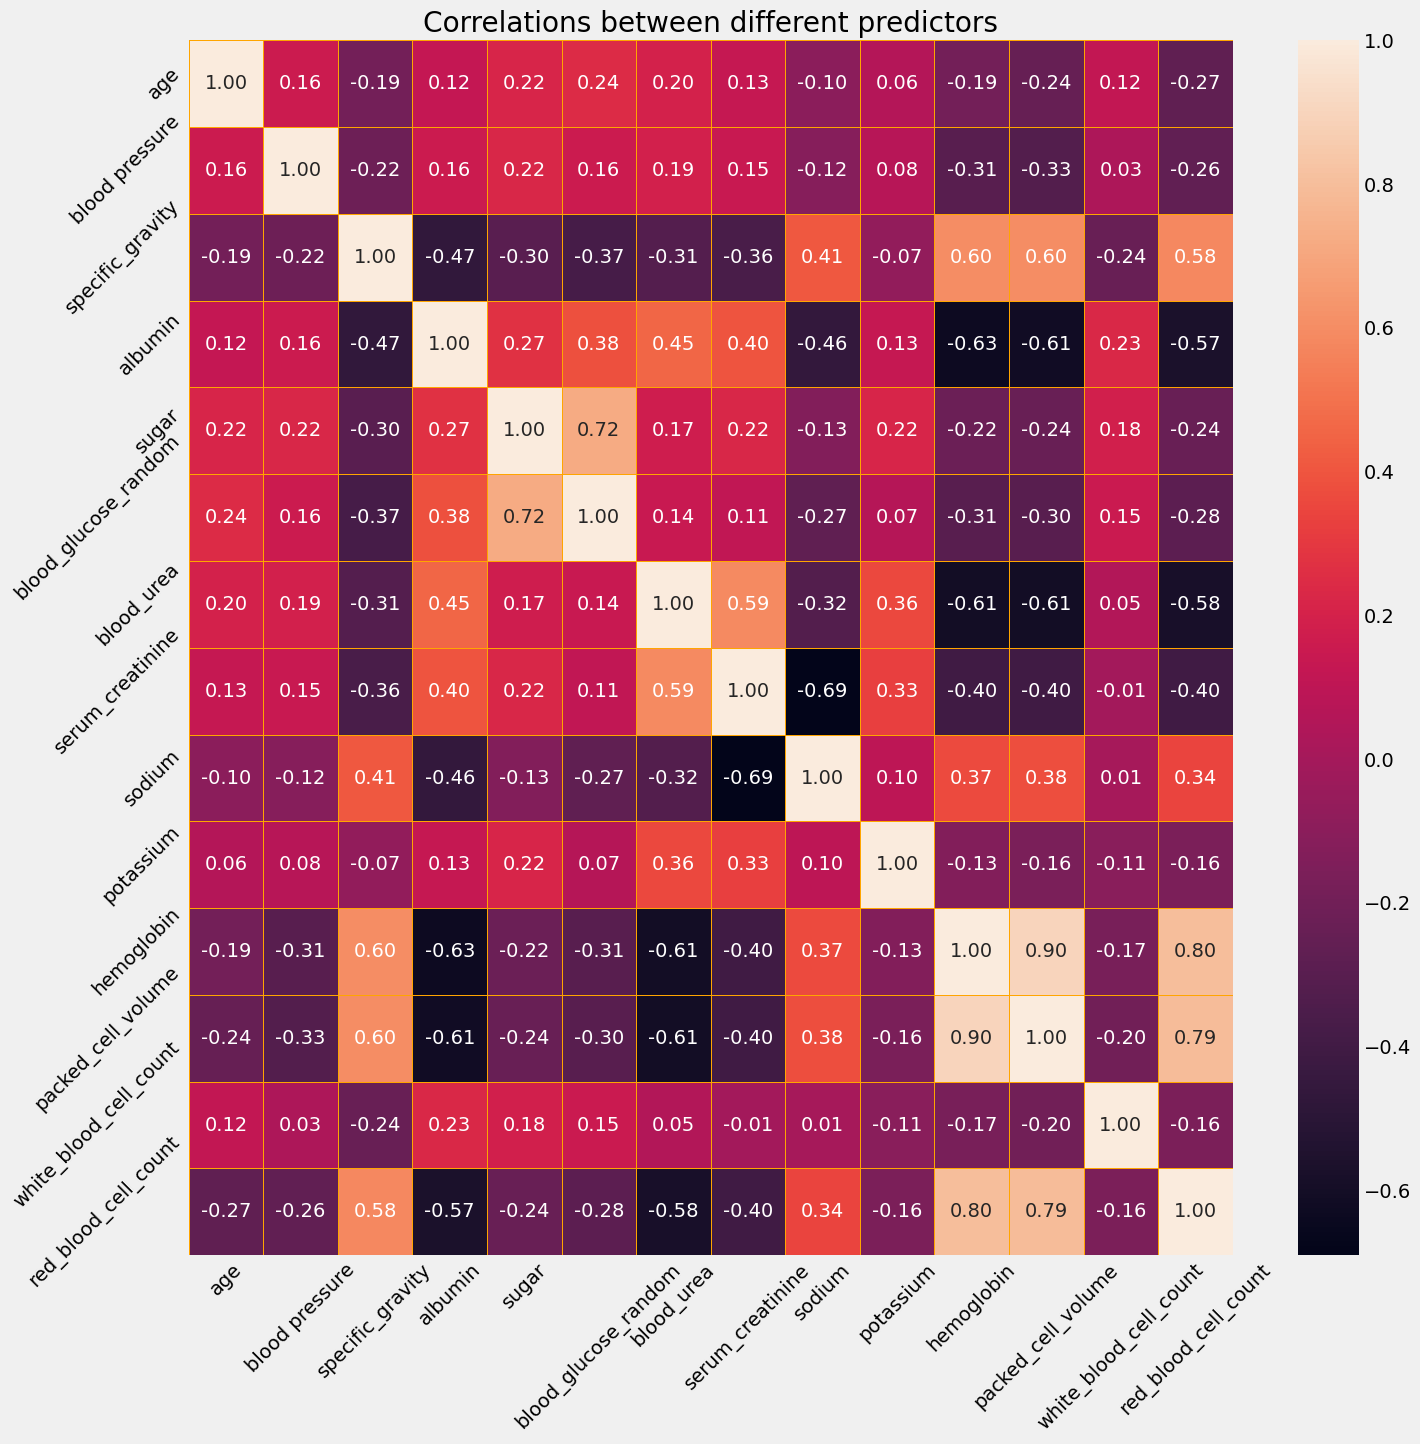

In [21]:
corr_df = df[num_cols].corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()


Positive Correlation

    hemoglobin -> red_blood_cell_count,packed_cell_volume, specific_gravity
    red_blood_cell_count -> packed_cell_volume,specific_gravity
    specific_gravity -> packed_cell_volume
    blood_glucose_random -> sugar
    serum_creatinine -> blood_urea

Negative correlation

    Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count
    serum_creatinine -> sodium
    blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count



In [22]:
categorical_columns = cat_cols
categorical_df = df[categorical_columns]

# Create a matrix to store the phi coefficients
phi_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns, dtype=float)

# Function to calculate phi coefficient from a contingency table
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    # Safe division and adjust for the minimum shape
    if chi2 == 0 or x.size == 0:
        return 0
    phi = np.sqrt(chi2 / (x.size * (min(contingency_table.shape) - 1)))
    return phi


# Populate the matrix with phi coefficients
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:
            phi = phi_coefficient(categorical_df[col1], categorical_df[col2])
            phi_matrix.loc[col1, col2] = phi
        else:
            phi_matrix.loc[col1, col2] = 1.0 




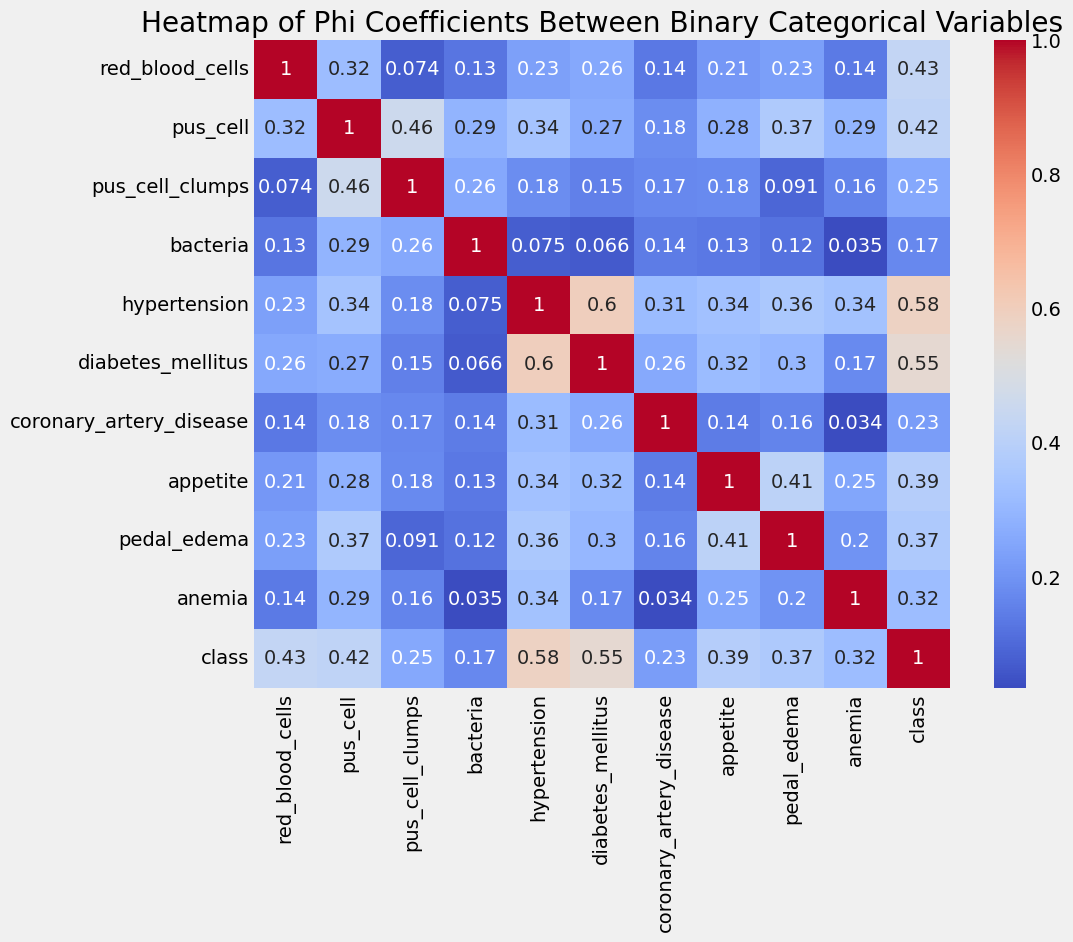

In [23]:
# Plotting the heatmap
plt.figure(figsize=[10, 8])
sns.heatmap(phi_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Phi Coefficients Between Binary Categorical Variables')
plt.show()


The strong and moderate correlations with the class variable (CKD) indicate that features like hypertension, diabetes_mellitus, red_blood_cells, and pus_cell could be important predictors for CKD

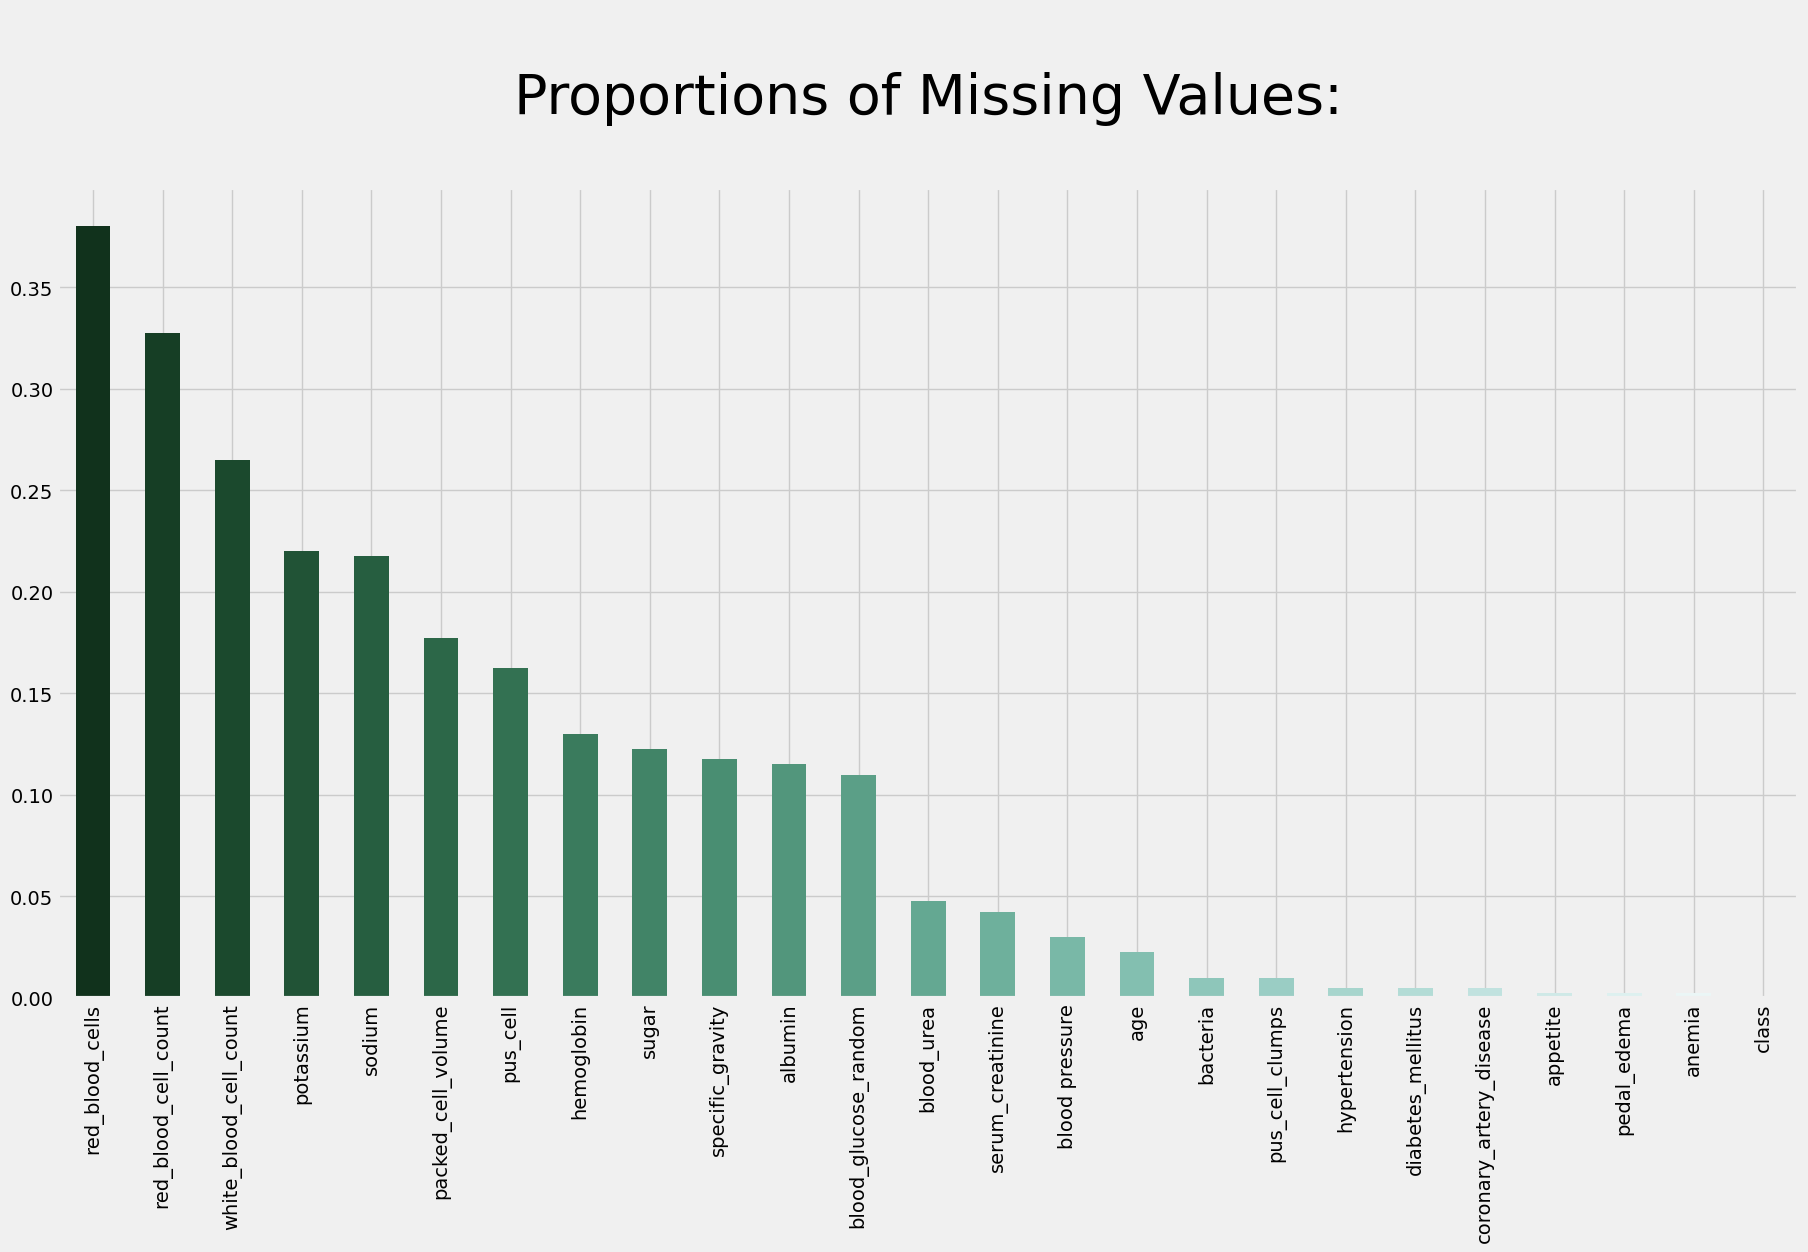

In [24]:
# visualize missing data
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [25]:
# Percentage of missing values
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

red_blood_cells            38.00
red_blood_cell_count       32.75
white_blood_cell_count     26.50
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.75
pus_cell                   16.25
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood pressure              3.00
age                         2.25
bacteria                    1.00
pus_cell_clumps             1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

<Axes: >

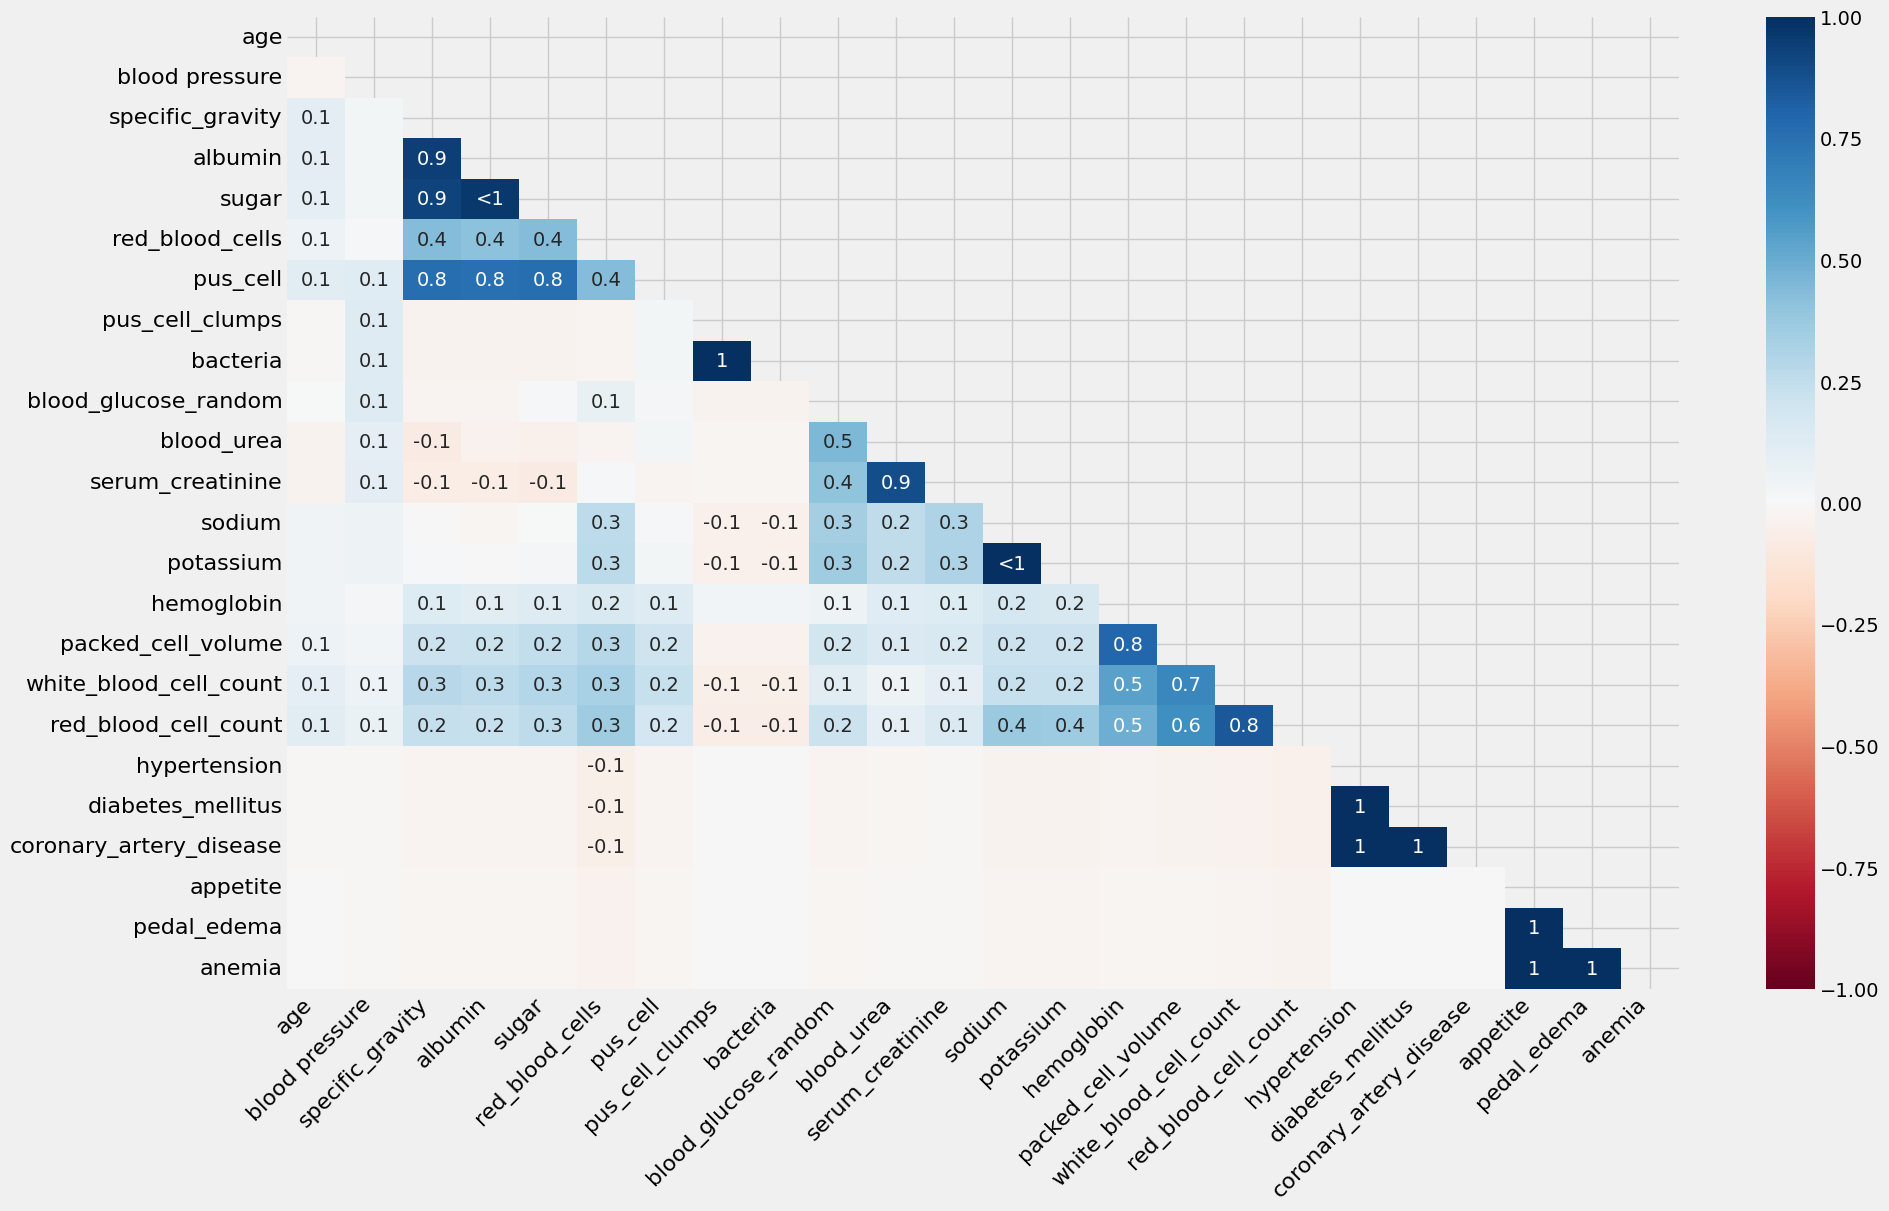

In [26]:
msno.heatmap(df)

<Axes: >

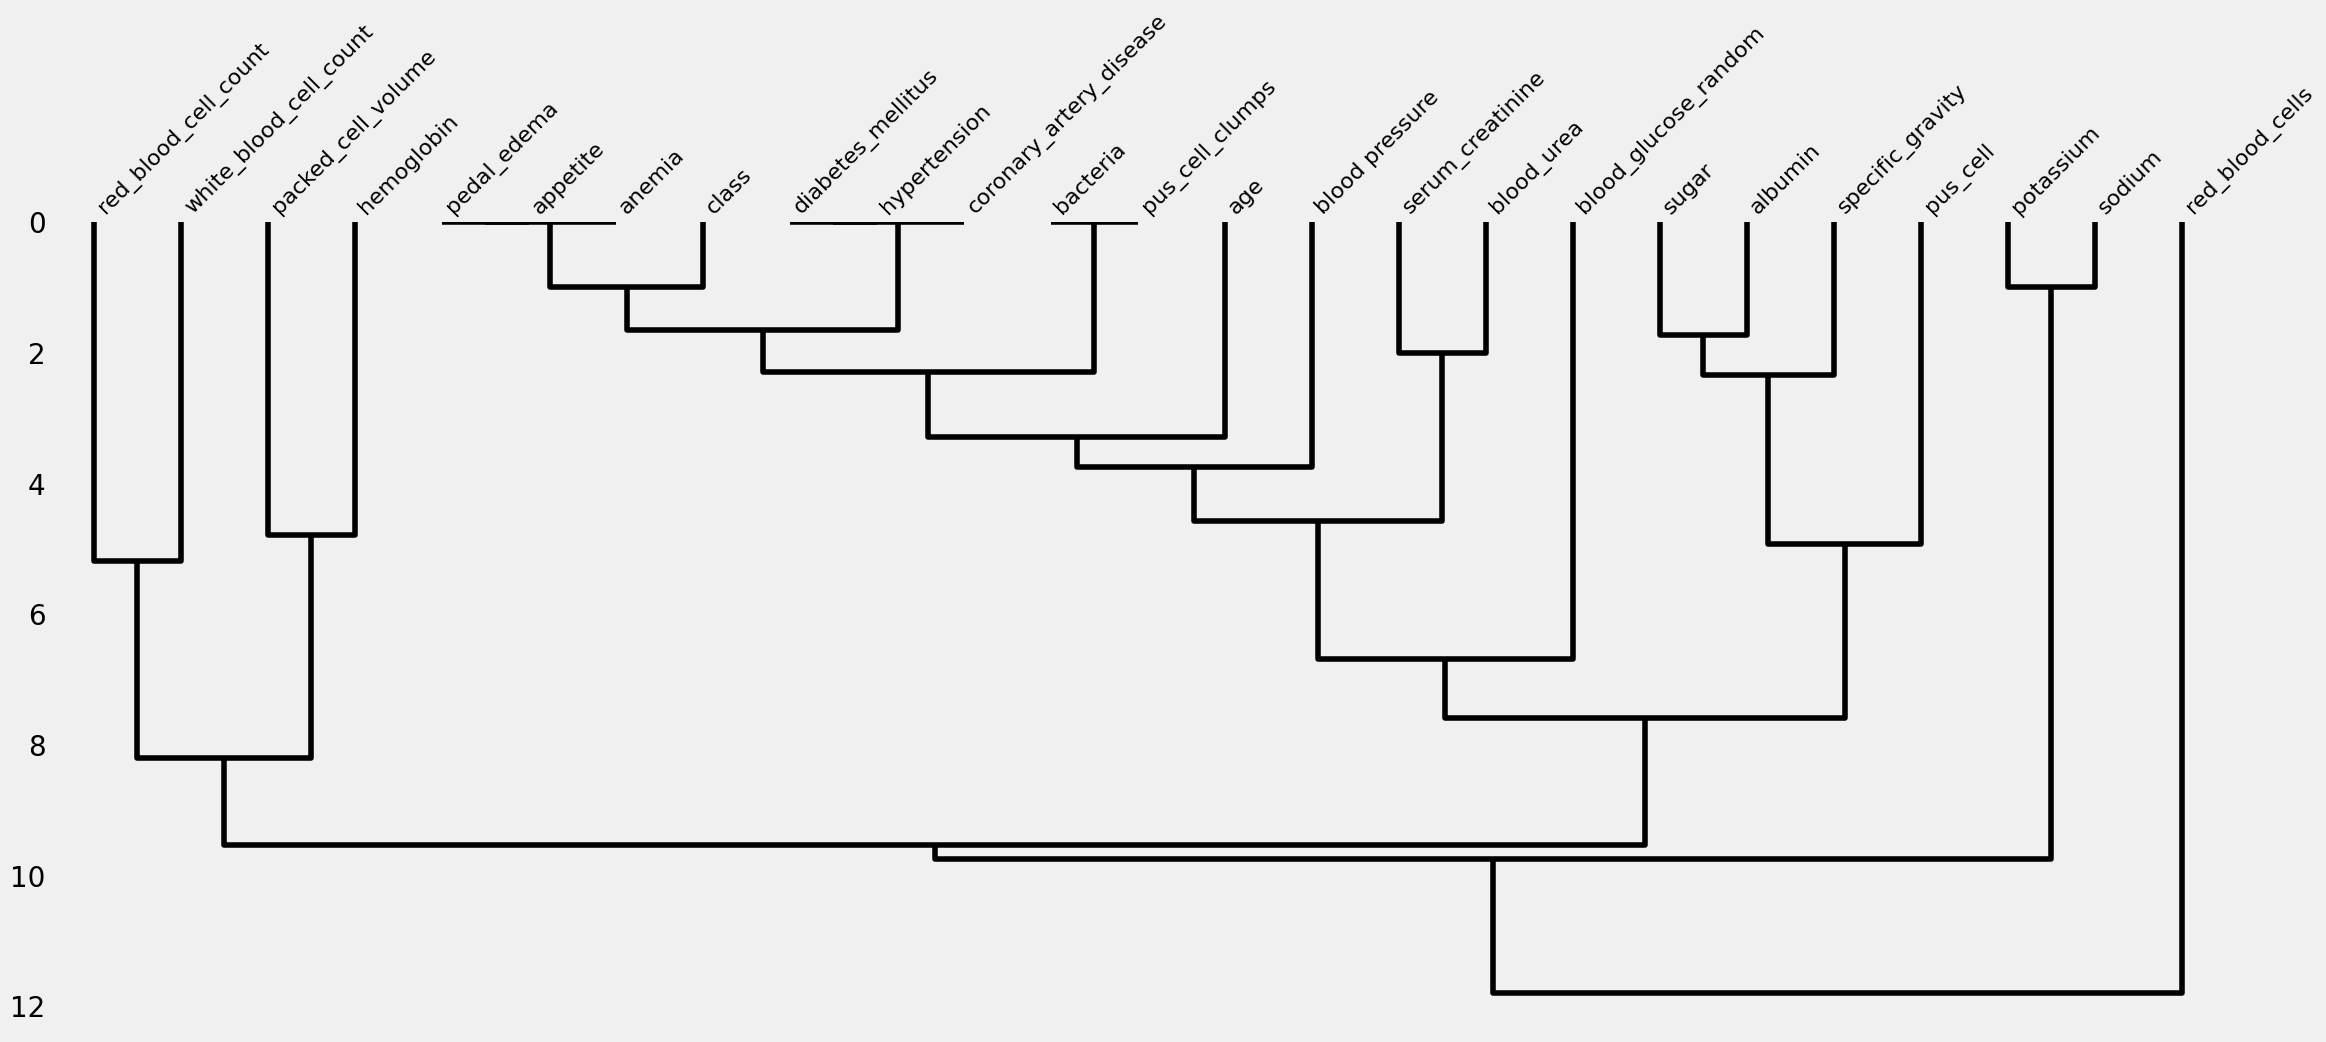

In [27]:
msno.dendrogram(df)

In [28]:


# Function to perform ANOVA
def anova_missingness(df, feature):
    not_null = df[~df[feature].isnull()]
    null = df[df[feature].isnull()]
    
    results = {}
    for col in df.columns:
        if col != feature and df[col].dtype in ['int64', 'float64']:
            f_stat, p_val = f_oneway(not_null[col].dropna(), null[col].dropna())
            results[col] = p_val
    return results

# Perform ANOVA for each numeric column
for feature in num_cols:
    print(f"Results for {feature}:")
    results = anova_missingness(df, feature)
    for col, p_val in results.items():
        print(f"{col}: p-value = {p_val:.5f}")





Results for age:
blood pressure: p-value = 0.83972
specific_gravity: p-value = 0.16159
albumin: p-value = 0.07254
sugar: p-value = 0.79332
blood_glucose_random: p-value = 0.99177
blood_urea: p-value = 0.33958
serum_creatinine: p-value = 0.72723
sodium: p-value = 0.80733
potassium: p-value = 0.84045
hemoglobin: p-value = 0.02576
packed_cell_volume: p-value = 0.04701
white_blood_cell_count: p-value = 0.97612
red_blood_cell_count: p-value = 0.42162
Results for blood pressure:
age: p-value = 0.00000
specific_gravity: p-value = 0.17697
albumin: p-value = 0.50283
sugar: p-value = 0.88389
blood_glucose_random: p-value = 0.64706
blood_urea: p-value = 0.42745
serum_creatinine: p-value = 0.68733
sodium: p-value = 0.54175
potassium: p-value = 0.66111
hemoglobin: p-value = 0.79492
packed_cell_volume: p-value = 0.93902
white_blood_cell_count: p-value = 0.70153
red_blood_cell_count: p-value = 0.91832
Results for specific_gravity:
age: p-value = 0.01027
blood pressure: p-value = 0.03803
albumin: p-va

In [29]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood pressure             12
age                         9
dtype: int64

In [30]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

Iterative imputer and feature encoding

In [31]:

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verify the imputation
print(df_encoded)






      age  blood pressure  specific_gravity  albumin  sugar  \
0    48.0            80.0             1.020      1.0    0.0   
1     7.0            50.0             1.020      4.0    0.0   
2    62.0            80.0             1.010      2.0    3.0   
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

     blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
0                   121.0        36.0               1.2     NaN        NaN   
1                     NaN        18.0               0.8     NaN        NaN   
2        

In [32]:
# Define columns to be imputed (all columns except target)
cols_to_impute = df_encoded.columns

print(cols_to_impute)

Index(['age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count',
       'red_blood_cells_normal', 'pus_cell_normal', 'pus_cell_clumps_present',
       'bacteria_present', 'hypertension_yes', 'diabetes_mellitus_yes',
       'coronary_artery_disease_yes', 'appetite_poor', 'pedal_edema_yes',
       'anemia_yes', 'class_notckd'],
      dtype='object')


In [33]:
# Initialize IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_encoded[cols_to_impute] = imp.fit_transform(df_encoded[cols_to_impute])

# Verify the imputation
print(df_encoded.isnull().sum())

age                            0
blood pressure                 0
specific_gravity               0
albumin                        0
sugar                          0
blood_glucose_random           0
blood_urea                     0
serum_creatinine               0
sodium                         0
potassium                      0
hemoglobin                     0
packed_cell_volume             0
white_blood_cell_count         0
red_blood_cell_count           0
red_blood_cells_normal         0
pus_cell_normal                0
pus_cell_clumps_present        0
bacteria_present               0
hypertension_yes               0
diabetes_mellitus_yes          0
coronary_artery_disease_yes    0
appetite_poor                  0
pedal_edema_yes                0
anemia_yes                     0
class_notckd                   0
dtype: int64


In [34]:
df_encoded.head

<bound method NDFrame.head of       age  blood pressure  specific_gravity  albumin  sugar  \
0    48.0            80.0             1.020      1.0    0.0   
1     7.0            50.0             1.020      4.0    0.0   
2    62.0            80.0             1.010      2.0    3.0   
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

     blood_glucose_random  blood_urea  serum_creatinine      sodium  \
0              121.000000        36.0               1.2  139.275122   
1              137.031349        18.0               0.8  132.597474   


Step 5 : Checking outliers

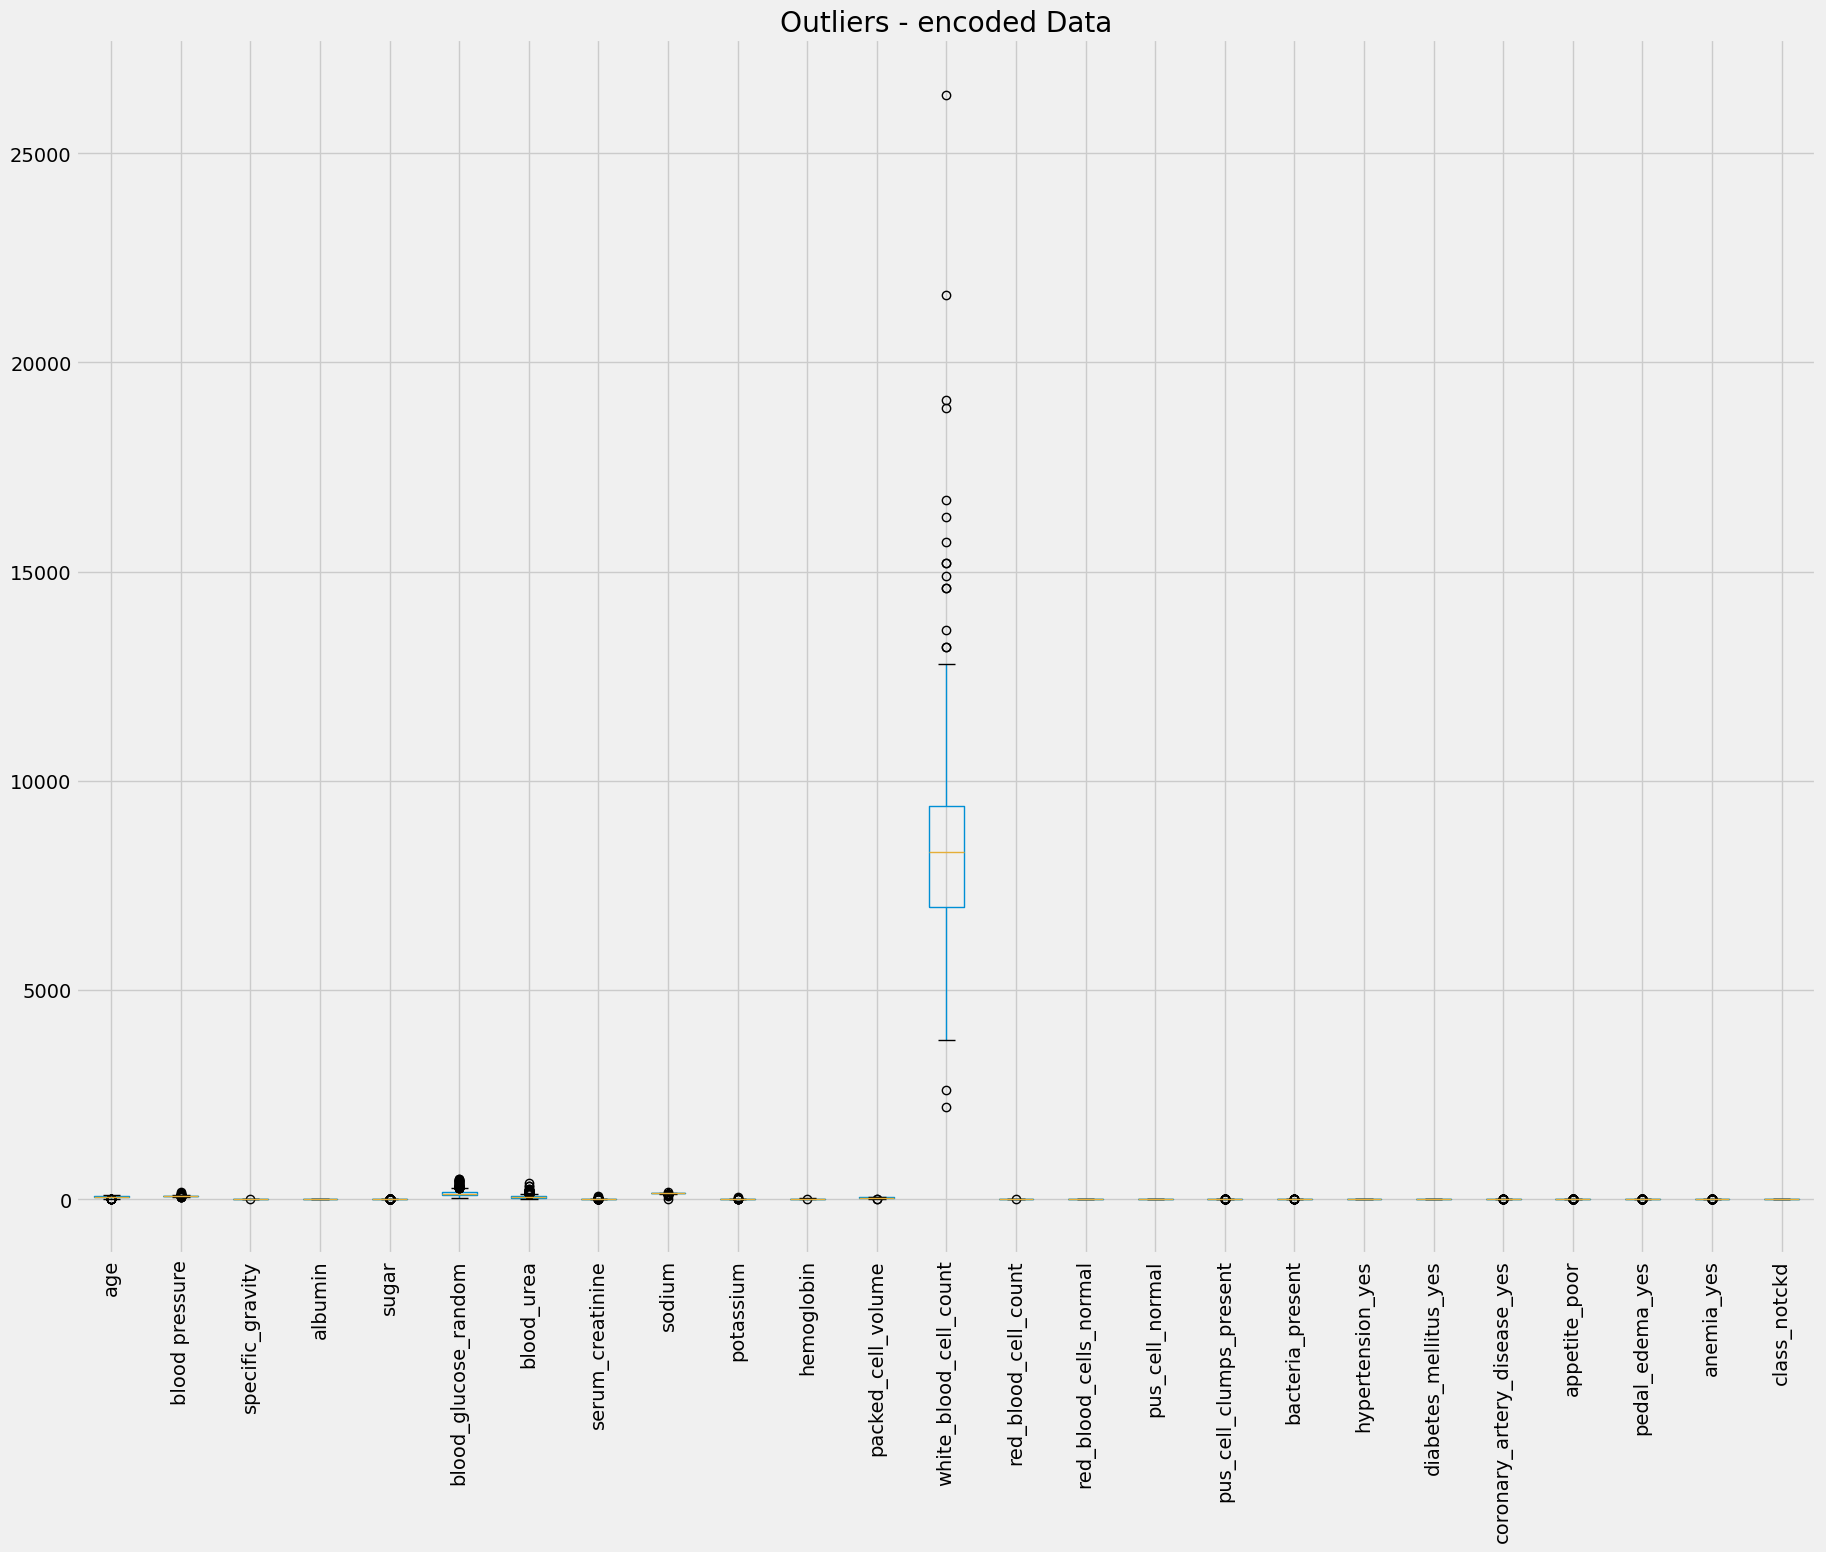

In [35]:
# Outlier Visualisation
plt.figure(figsize=(20, 15))
df_encoded.boxplot()
plt.title('Outliers - encoded Data')
plt.xticks(rotation=90)
plt.show()

In [36]:
def detect_outliers(df, features):
    outliers = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers.extend(feature_outliers.index.tolist())
    return list(set(outliers))


outliers_indices = detect_outliers(df_encoded,num_cols)
outliers_df = df_encoded.loc[outliers_indices]

print(outliers_df)

           age  blood pressure  specific_gravity   albumin     sugar  \
1     7.000000       50.000000          1.020000  4.000000  0.000000   
2    62.000000       80.000000          1.010000  2.000000  3.000000   
3    48.000000       70.000000          1.005000  4.000000  0.000000   
6    68.000000       70.000000          1.010000  0.000000  0.000000   
7    24.000000       77.226306          1.015000  2.000000  4.000000   
..         ...             ...               ...       ...       ...   
268  52.323632       80.000000          1.021855 -0.157069  0.066035   
280  47.000000       80.000000          1.021351  0.060793  0.030720   
295  44.000000       70.000000          1.021988  0.016801  0.174479   
322  70.000000       60.000000          1.021478 -0.349078 -0.050533   
346  33.000000       60.000000          1.022981  0.232621  0.104007   

     blood_glucose_random  blood_urea  serum_creatinine      sodium  \
1              137.031349        18.0               0.8  132.597

Deciding not to handle outliers directly where extreme values may represent critical and genuine information, but scaling may help reduce the effect of outliers 

Step 6 : Feature scaling

In [37]:
from sklearn.preprocessing import RobustScaler
# Continuous columns in the dataset
continuous_columns = [
    'age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
    'red_blood_cell_count'
]

# Function to scale the continuous columns
def scale_data(df, features):
    scaler = RobustScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

# Scale the data
df_scaled = df_encoded.copy()
df_scaled = scale_data(df_scaled, continuous_columns)



In [38]:
df_scaled

age  blood pressure  specific_gravity  albumin  sugar  \
0   -0.295455             0.0          0.683442      0.5    0.0   
1   -2.159091            -3.0          0.683442      2.0    0.0   
2    0.340909             0.0         -0.683629      1.0    3.0   
3   -0.295455            -1.0         -1.367165      2.0    0.0   
4   -0.159091             0.0         -0.683629      1.0    0.0   
..        ...             ...               ...      ...    ...   
395  0.022727             0.0          0.683442      0.0    0.0   
396 -0.568182            -1.0          1.366977      0.0    0.0   
397 -1.931818             0.0          0.683442      0.0    0.0   
398 -1.704545            -2.0          1.366977      0.0    0.0   
399  0.159091             0.0          1.366977      0.0    0.0   

     blood_glucose_random  blood_urea  serum_creatinine    sodium  potassium  \
0               -0.016064   -0.166604         -0.076125  0.212520  -0.168781   
1                0.241467   -0.628143         -0.279125 -0.900421  -0.761326   
2                4.835341    0.269293          0.228375 -0.859416   0.481681   
3               -0.080321    0.346216          1.243376 -4.500000  -1.667475   
4               -0.257028   -0.423015          0.025375 -0.247007  -0.502078   
..                    ...         ...               ...       ...        ...   
395              0.289157    0.166729         -0.431375  2.000000   0.514343   
396             -0.755020   -0.294810         -0.076125  0.500000  -0.758384   
397             -0.353414   -0.423015         -0.380625 -0.166667   0.059798   
398             -0.128514    0.192370         -0.177625 -0.500000   0.514343   
399              0.144578   -0.628143         -0.126875  0.500000  -0.758384   

     ...  pus_cell_normal  pus_cell_clumps_present  bacteria_present  \
0    ...              1.0                      0.0               0.0   
1    ...              1.0                      0.0               0.0   
2    ...              1.0                      0.0               0.0   
3    ...              0.0                      1.0               0.0   
4    ...              1.0                      0.0               0.0   
..   ...              ...                      ...               ...   
395  ...              1.0                      0.0               0.0   
396  ...              1.0                      0.0               0.0   
397  ...              1.0                      0.0               0.0   
398  ...              1.0                      0.0               0.0   
399  ...              1.0                      0.0               0.0   

     hypertension_yes  diabetes_mellitus_yes  coronary_artery_disease_yes  \
0                 1.0                    1.0                          0.0   
1                 0.0                    0.0                          0.0   
2                 0.0                    1.0                          0.0   
3                 1.0                    0.0                          0.0   
4                 0.0                    0.0                          0.0   
..                ...                    ...                          ...   
395               0.0                    0.0                          0.0   
396               0.0                    0.0                          0.0   
397               0.0                    0.0                          0.0   
398               0.0                    0.0                          0.0   
399               0.0                    0.0                          0.0   

     appetite_poor  pedal_edema_yes  anemia_yes  class_notckd  
0              0.0              0.0         0.0           0.0  
1              0.0              0.0         0.0           0.0  
2              1.0              0.0         1.0           0.0  
3              1.0              1.0         1.0           0.0  
4              0.0              0.0         0.0           0.0  
..             ...              ...         ...           ...  
395   

## Exploratory data analysis

In [39]:
sns.set_style('darkgrid')

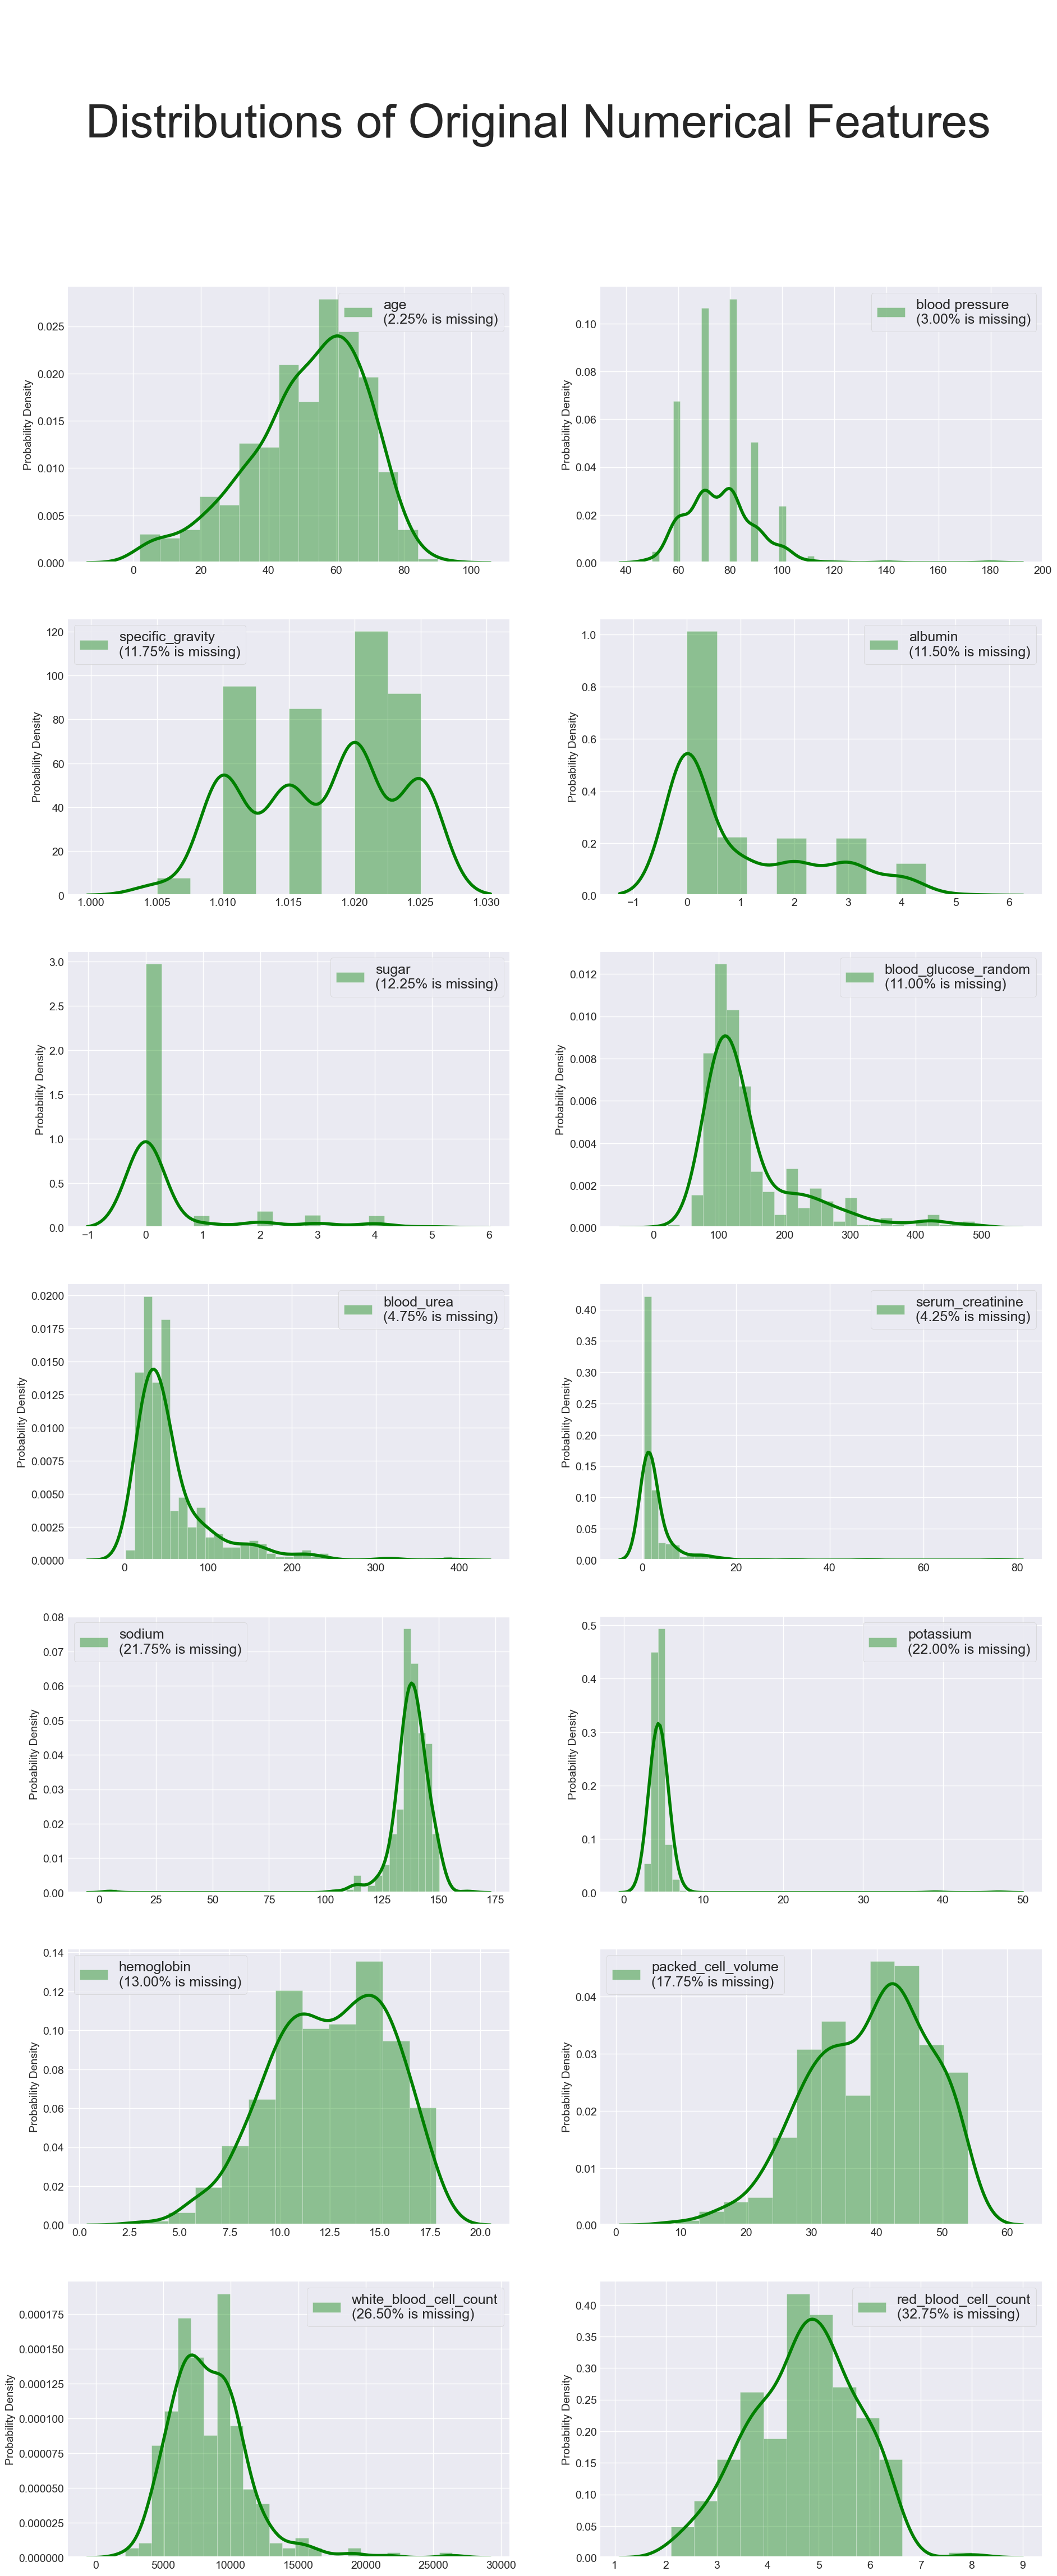

In [40]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Original Numerical Features', fontsize=60)

for index, column in enumerate(num_cols):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

Distribution of the original categorical variables 

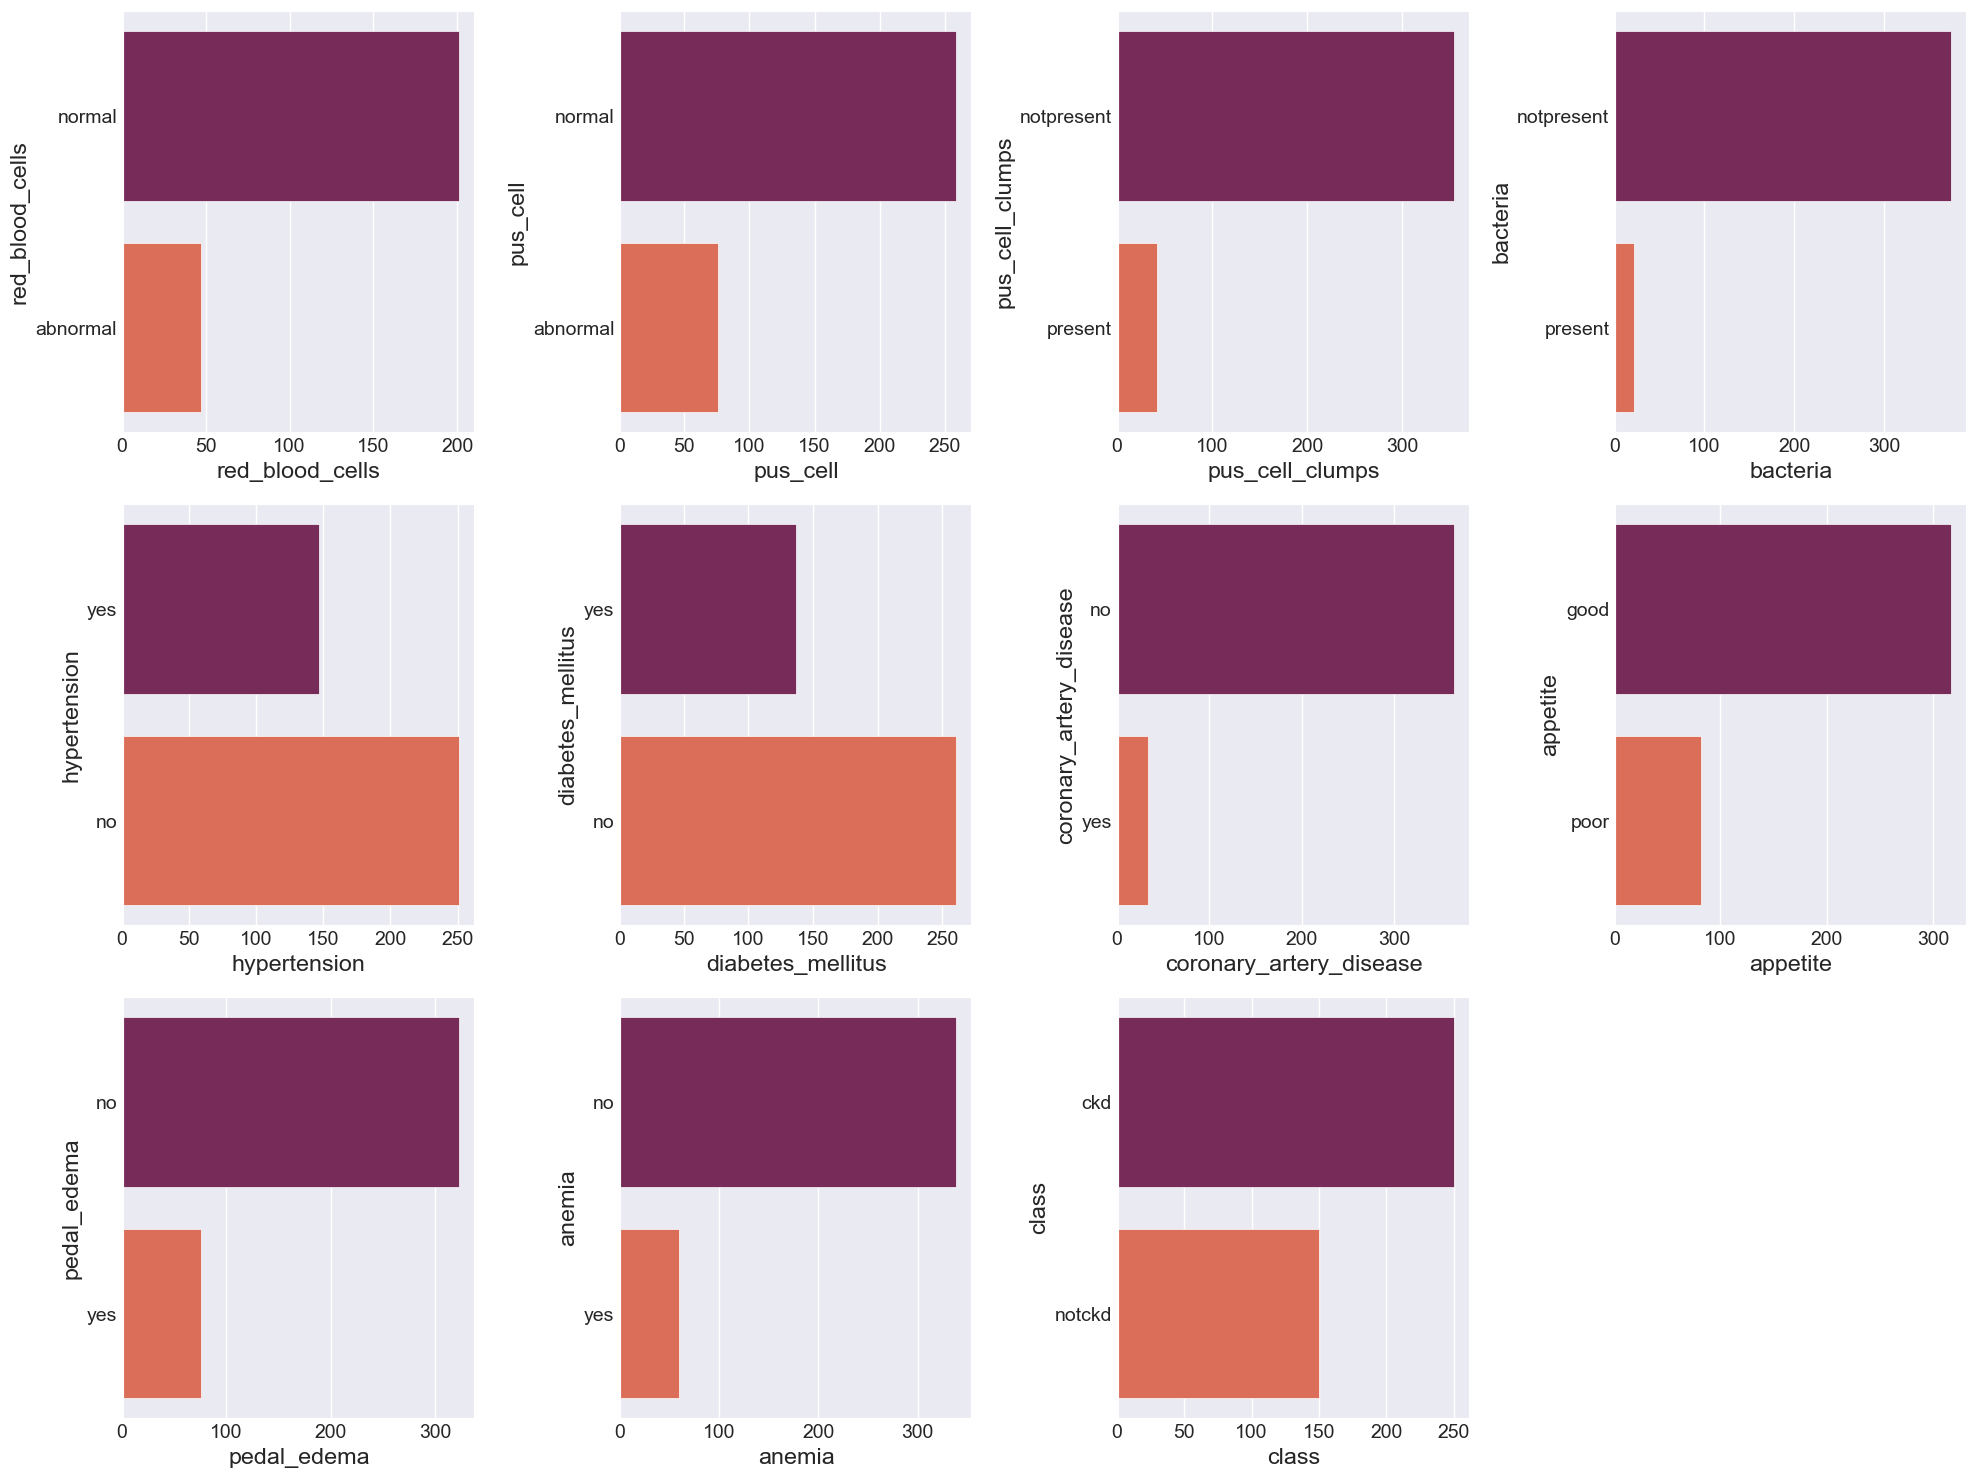

In [41]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

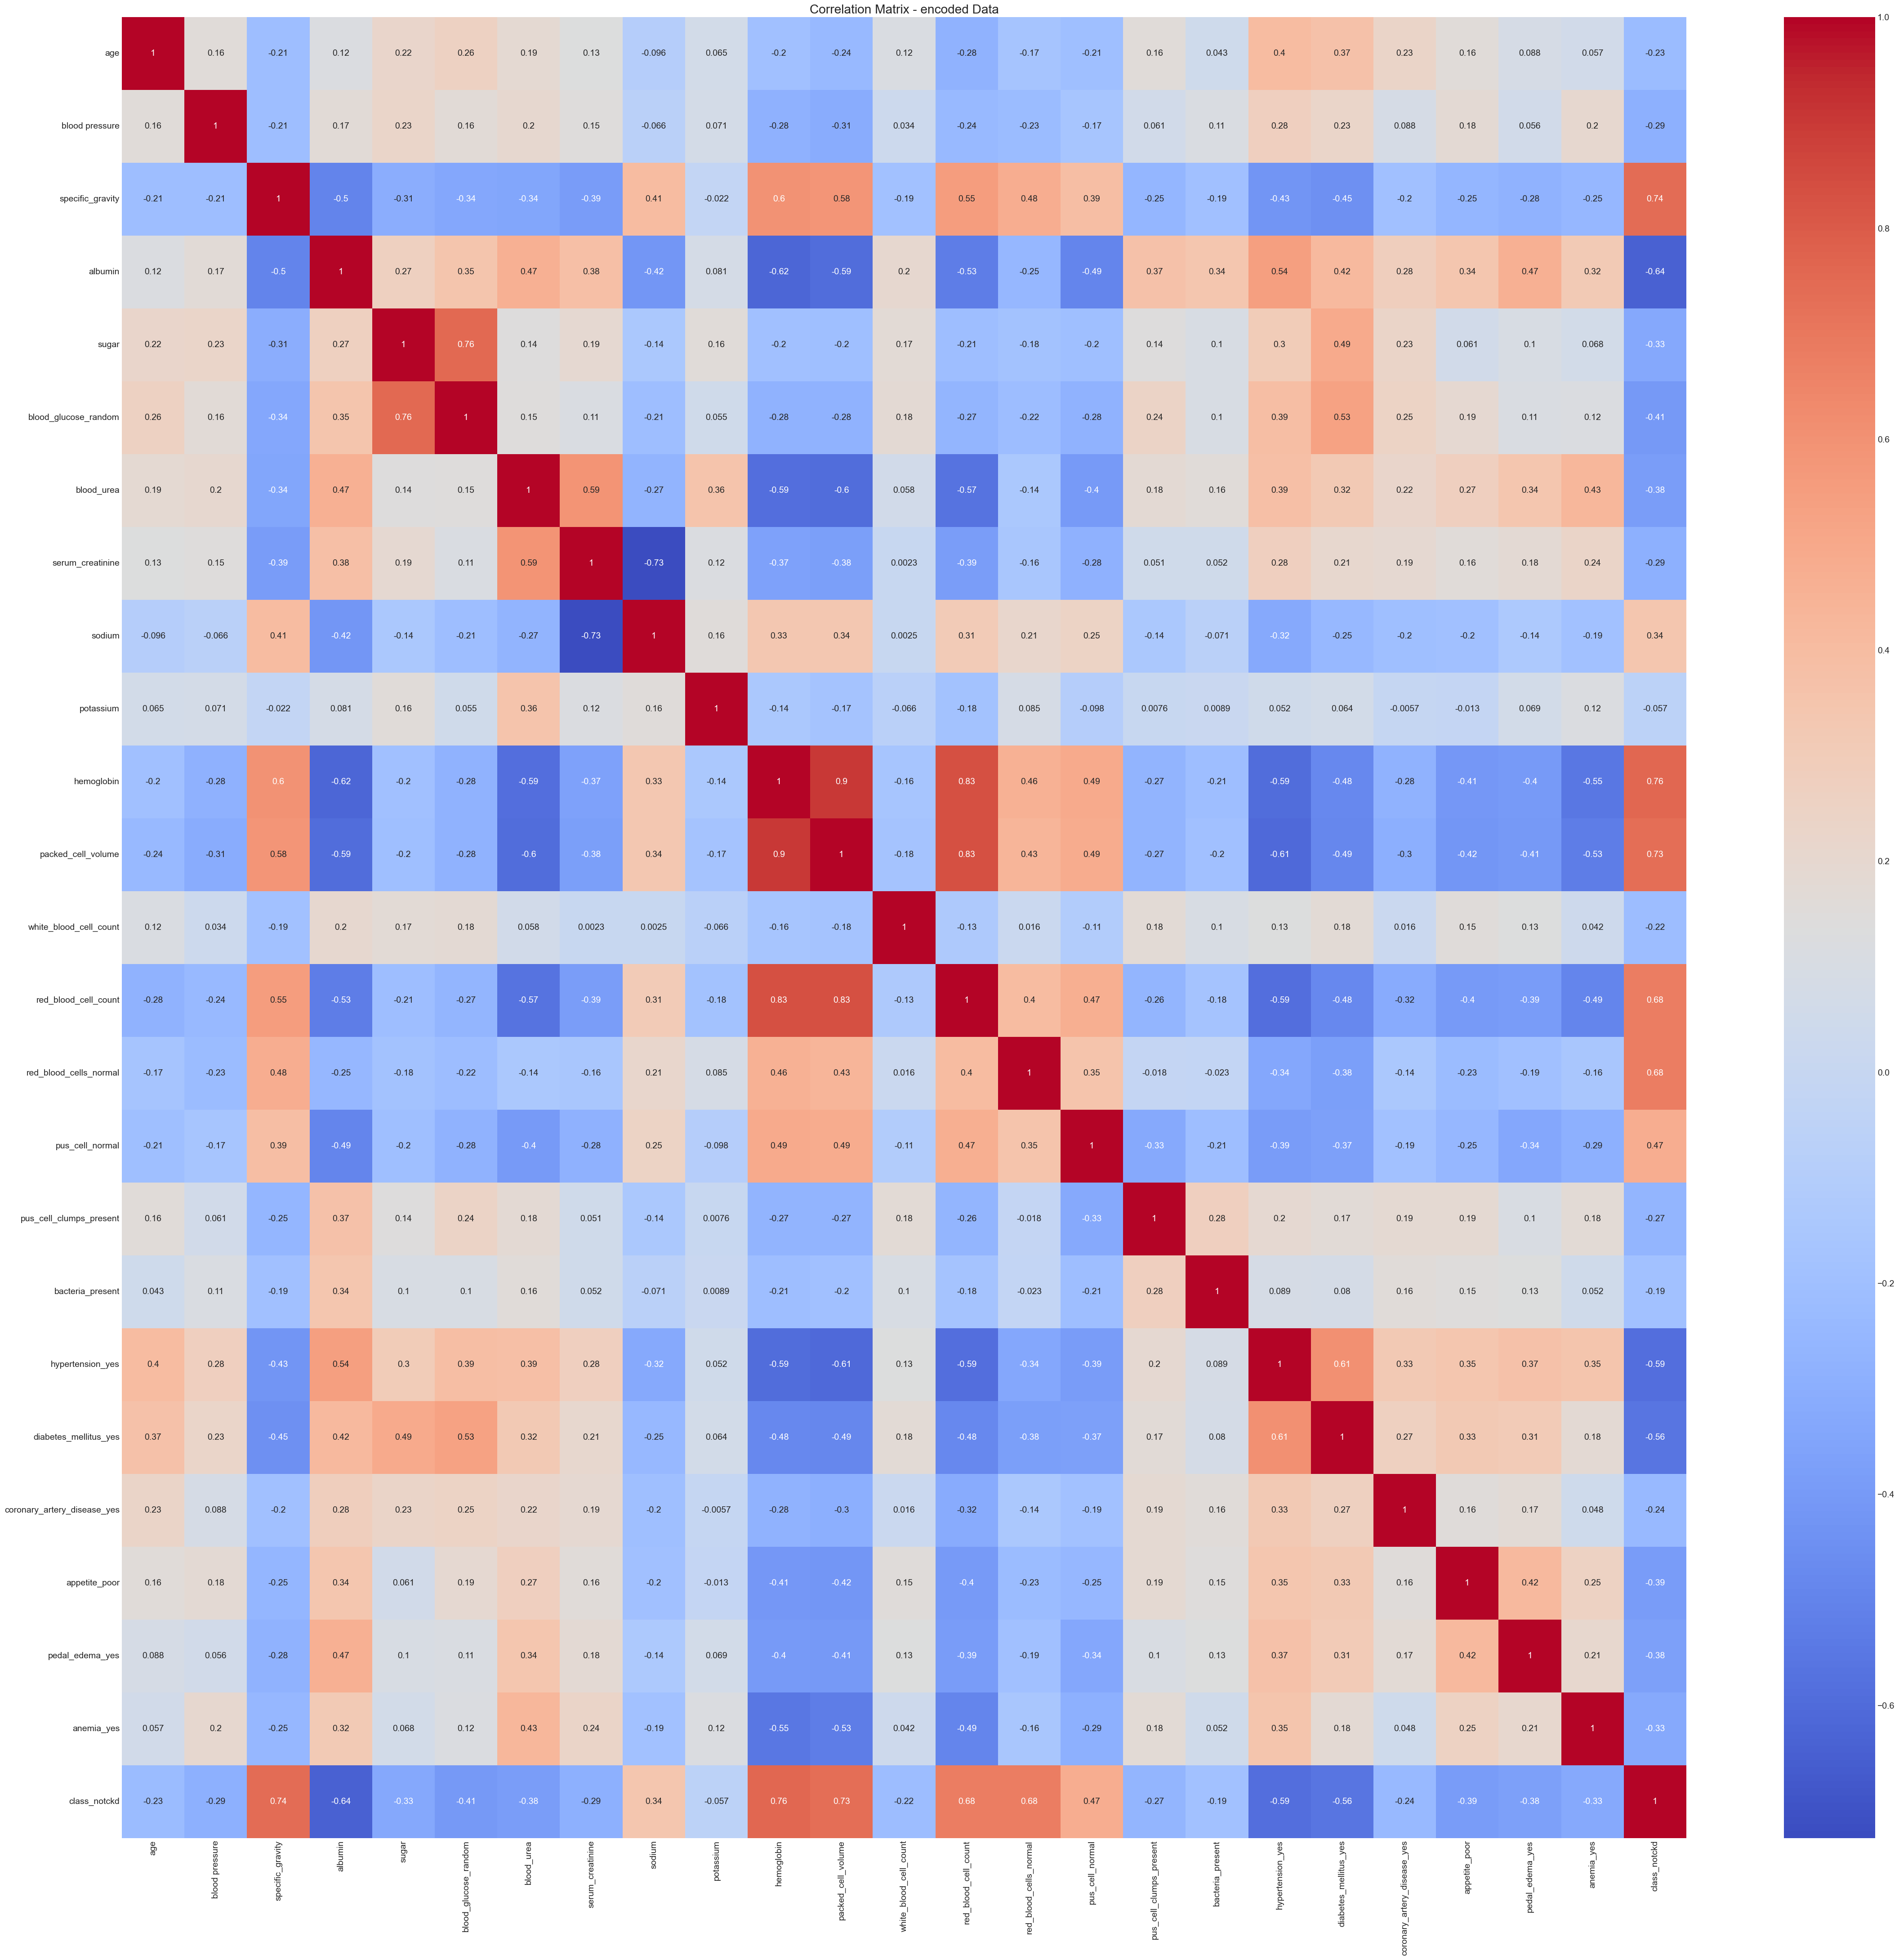

In [42]:
# Correlation Matrix
plt.figure(figsize=(50, 50))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - encoded Data')
plt.show()


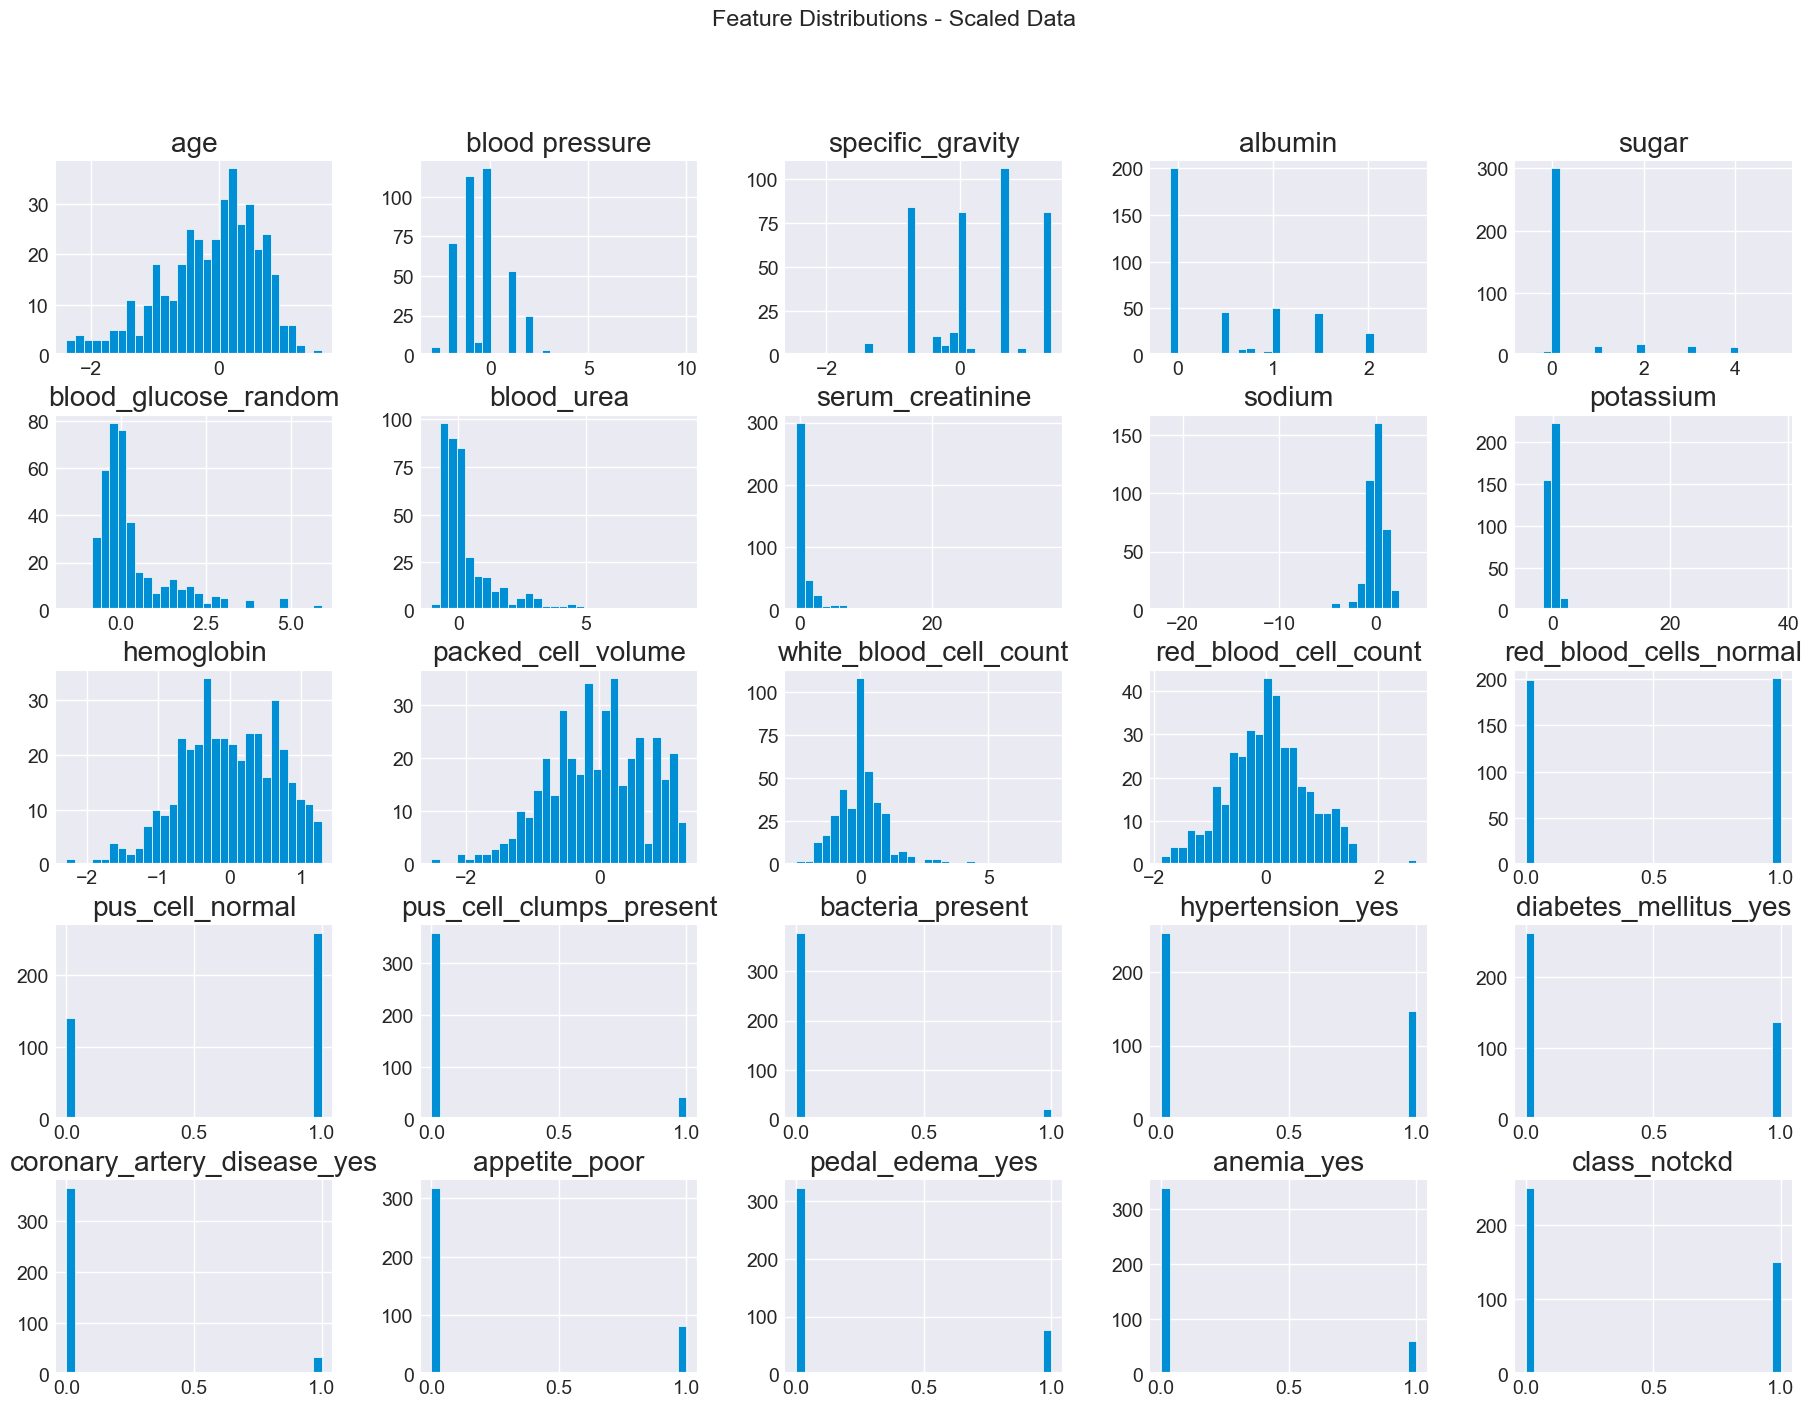

In [43]:
df_scaled.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions - Scaled Data')
plt.show()


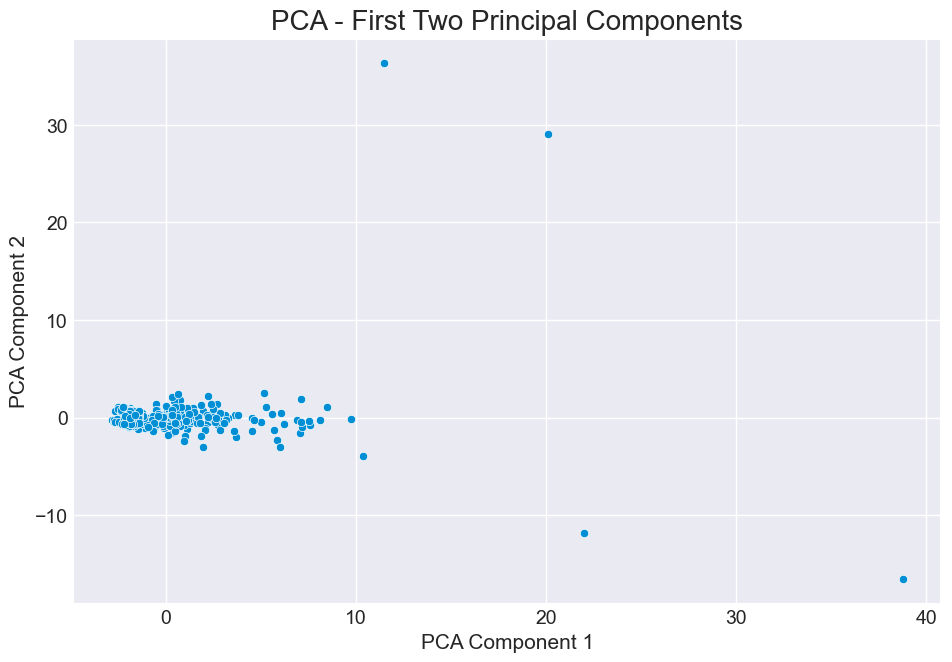

In [44]:
pca = PCA(n_components=2)  
pca_transformed = pca.fit_transform(df_scaled)


pca_df = pd.DataFrame(data=pca_transformed, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='winter_r')
plt.title('PCA - First Two Principal Components', fontsize=20)
plt.xlabel('PCA Component 1', fontsize=15)
plt.ylabel('PCA Component 2', fontsize=15)
plt.grid(True)
plt.show()


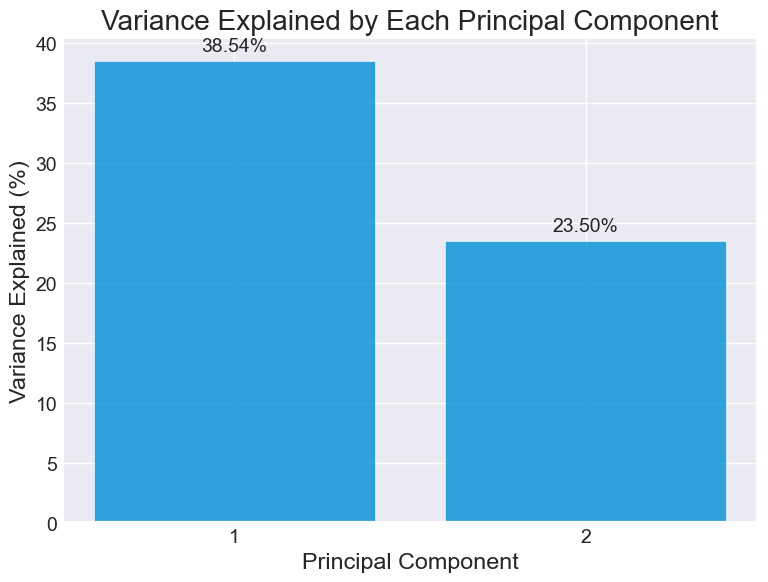

In [45]:

variance_explained = pca.explained_variance_ratio_

# Calculate cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained * 100, alpha=0.8)

for i, var_exp in enumerate(variance_explained):
    plt.text(i + 1, (var_exp * 100) + 0.5, f'{var_exp * 100:.2f}%', ha='center', va='bottom')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(variance_explained) + 1))
plt.grid(True)
plt.show()


The first two components together explain about 62% of the total variance. More than half of the dataset's information can be captured in just two dimensions, indicating a good dimensionality reduction.

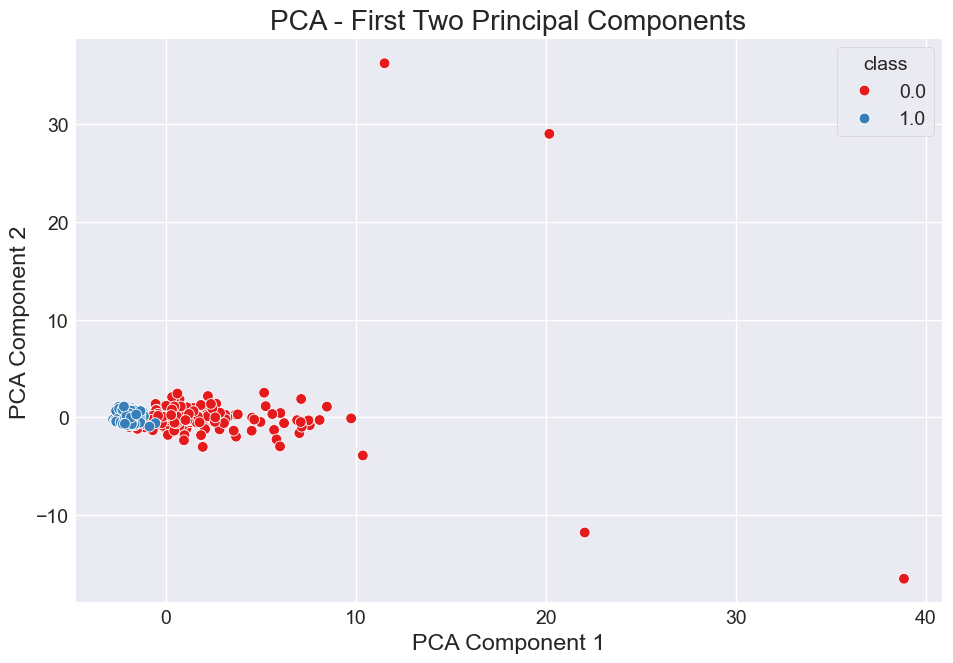

In [46]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled.drop('class_notckd', axis=1))

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = df_scaled['class_notckd']

# Plot the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='Set1', s=60)
plt.title('PCA - First Two Principal Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()


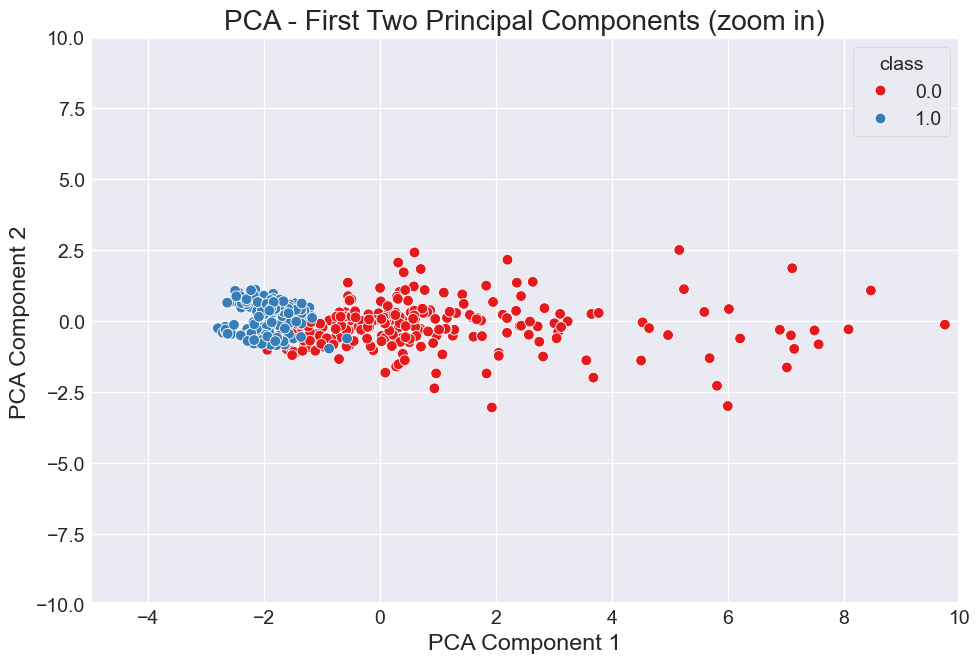

In [69]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='Set1', s=60)
plt.title('PCA - First Two Principal Components (zoom in)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.xlim(-5, 10)
plt.ylim(-10, 10)

plt.show()

## Feature selection

                        feature  importance
10                   hemoglobin    0.205690
2              specific_gravity    0.174527
11           packed_cell_volume    0.149090
7              serum_creatinine    0.093498
13         red_blood_cell_count    0.085913
14       red_blood_cells_normal    0.072265
3                       albumin    0.060548
18             hypertension_yes    0.034331
19        diabetes_mellitus_yes    0.023969
5          blood_glucose_random    0.020558
6                    blood_urea    0.014797
8                        sodium    0.012522
15              pus_cell_normal    0.010024
4                         sugar    0.009237
12       white_blood_cell_count    0.007247
21                appetite_poor    0.005641
1                blood pressure    0.005523
0                           age    0.004706
22              pedal_edema_yes    0.004698
9                     potassium    0.003475
23                   anemia_yes    0.001440
17             bacteria_present 

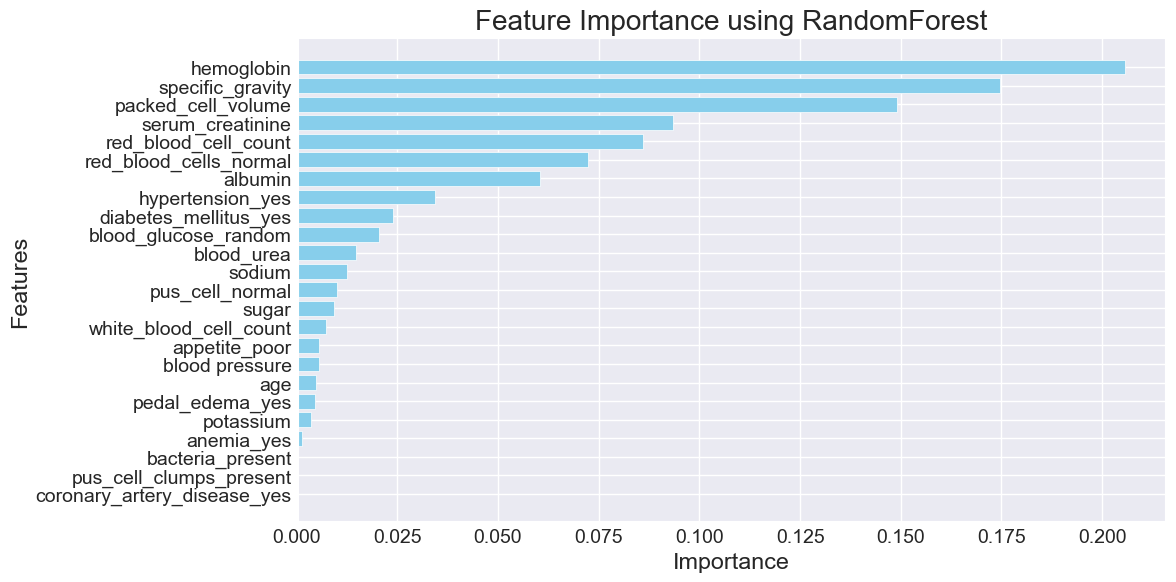

In [48]:

X = df_scaled.drop(columns=['class_notckd'])

y = df_scaled['class_notckd']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print feature importances
print(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance using RandomForest')
plt.gca().invert_yaxis()  
plt.show()


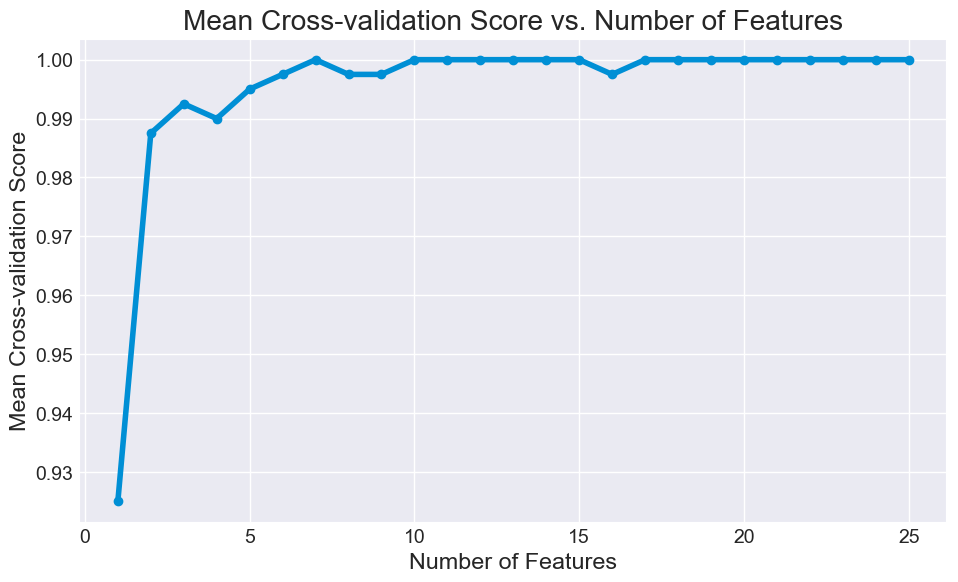

Optimal number of features: 7


In [49]:

X = df_scaled.drop(columns=['class_notckd'])
y = df_scaled['class_notckd']


model = RandomForestClassifier(random_state=42)

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Variable to store the mean cross-validation scores
mean_cv_scores = []

# Evaluate RFE with different numbers of features
feature_range = range(1, 26)  # Assuming you have 25 features
for n_features in feature_range:
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    cv_scores = cross_val_score(rfe, X, y, cv=skf, scoring='accuracy')
    mean_cv_scores.append(cv_scores.mean())

# Plot the mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(feature_range, mean_cv_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-validation Score')
plt.title('Mean Cross-validation Score vs. Number of Features')
plt.show()


optimal_n_features = feature_range[mean_cv_scores.index(max(mean_cv_scores))]
print(f"Optimal number of features: {optimal_n_features}")



In [50]:
# Initialize the model
model = RandomForestClassifier(random_state=42)


n_features_to_select = 7 
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['specific_gravity', 'albumin', 'serum_creatinine', 'hemoglobin',
       'packed_cell_volume', 'red_blood_cell_count', 'red_blood_cells_normal'],
      dtype='object')


In [51]:
X_train = df_scaled[selected_features]

y_train = df_scaled['class_notckd']

<h1>Step 2 : Model training</h1>

**LOGISTIC REGRESSION**

In [53]:
# Define the model
lr = LogisticRegression()

# Define stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold stratified cross-validation
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", lr_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", lr_cv_scores.mean())


Cross-validation scores: [1.     0.9875 1.     1.     0.9875]
Mean Cross-validation score: 0.9949999999999999


**NEURAL NETWORK**

In [54]:
mlp = MLPClassifier()

# Define stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold stratified cross-validation
mlp_cv_scores = cross_val_score(mlp, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", mlp_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", mlp_cv_scores.mean())

Cross-validation scores: [1.     1.     1.     1.     0.9875]
Mean Cross-validation score: 0.9974999999999999


**SVM**

In [55]:
svm = SVC()

# Define stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold stratified cross-validation
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", svm_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", svm_cv_scores.mean())

Cross-validation scores: [1.     1.     1.     1.     0.9875]
Mean Cross-validation score: 0.9974999999999999


**Gaussian Naive Bayes**

In [56]:
gnb = GaussianNB()

# Perform 5-fold cross-validation
gnb_cv_scores = cross_val_score(gnb, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", gnb_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", gnb_cv_scores.mean())

Cross-validation scores: [1.     0.9875 0.975  0.9875 0.9625]
Mean Cross-validation score: 0.9825000000000002


**Decision Tree**

In [57]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# Initialize a list to store cross-validation scores
dt_cv_scores = []

# Perform 5-fold cross-validation
dt_cv_scores  = cross_val_score(dt, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", dt_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", np.mean(dt_cv_scores))

Cross-validation scores: [1.    1.    0.975 1.    0.975]
Mean Cross-validation score: 0.99


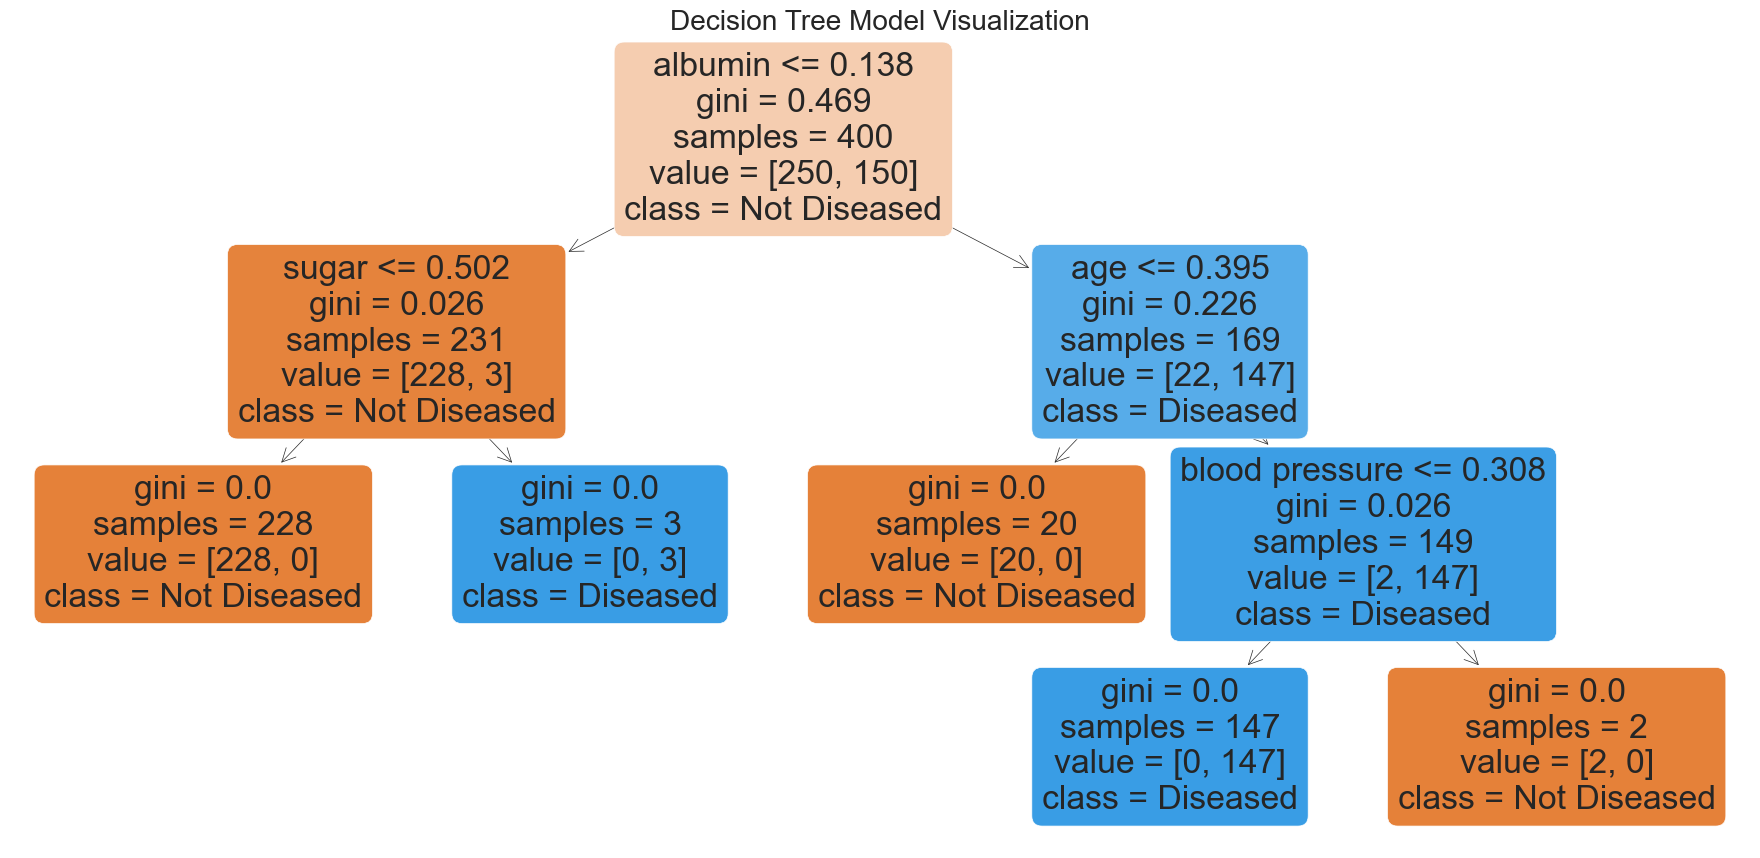

In [59]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Diseased', 'Diseased'], rounded=True)
plt.title("Decision Tree Model Visualization")
plt.show()

**BERNOULLI NAIVE BAIYES**

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store cross-validation scores
bernoulliNb_cv_scores = []

bernoulliNb= BernoulliNB()


bernoulliNb_cv_scores  = cross_val_score(bernoulliNb, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", bernoulliNb_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", np.mean(bernoulliNb_cv_scores))

Cross-validation scores: [0.9875 1.     0.9125 0.9875 1.    ]
Mean Cross-validation score: 0.9775


**KNN**

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store cross-validation scores
knn_cv_scores = []

knn = KNeighborsClassifier(n_neighbors=5)

knn_cv_scores  = cross_val_score(knn, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", knn_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", np.mean(knn_cv_scores))

Cross-validation scores: [1.     0.9875 1.     0.9875 1.    ]
Mean Cross-validation score: 0.9949999999999999


**RANDOM FOREST**

In [62]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store cross-validation scores
forest_cv_scores = []

forest = RandomForestClassifier(n_estimators=5, random_state=0)

forest_cv_scores  = cross_val_score(forest, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", forest_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", np.mean(forest_cv_scores))

Cross-validation scores: [1.     1.     0.9875 0.975  0.9875]
Mean Cross-validation score: 0.99


**xgBoost**

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store cross-validation scores
xgb_cv_scores = []

xgb = XGBClassifier()

xgb_cv_scores  = cross_val_score(xgb, X_train, y_train, cv=skf)

# Print cross-validation scores
print("Cross-validation scores:", xgb_cv_scores)

# Print mean cross-validation score
print("Mean Cross-validation score:", np.mean(xgb_cv_scores))

Cross-validation scores: [1.     1.     0.9875 1.     1.    ]
Mean Cross-validation score: 0.9974999999999999


<h1>Step 3 : Model Comparison</h1>

In [64]:

models_data = [
    {'Model': 'Logistic Regression', 'Mean Cross-validation score': lr_cv_scores},
    {'Model': 'Neural Network', 'Mean Cross-validation score': mlp_cv_scores},
    {'Model': 'SVM', 'Mean Cross-validation score': svm_cv_scores},
    {'Model': 'Gaussian Naive Bayes', 'Mean Cross-validation score': gnb_cv_scores},
    {'Model': 'Decision Tree', 'Mean Cross-validation score': dt_cv_scores},
    {'Model': 'Bernoulli Naive Bayes', 'Mean Cross-validation score': bernoulliNb_cv_scores},
    {'Model': 'KNN', 'Mean Cross-validation score': knn_cv_scores},
    {'Model': 'xgBoost', 'Mean Cross-validation score': xgb_cv_scores},
    {'Model': 'Random Forest Classifier', 'Mean Cross-validation score': forest_cv_scores}
]

# Convert the list of dictionaries to a DataFrame
models_df = pd.DataFrame(models_data)

# Calculate the mean cross-validation score for each model
models_df['Mean Cross-validation score'] = models_df['Mean Cross-validation score'].apply(lambda x: sum(x) / len(x))

# Sort the DataFrame by mean cross-validation score
models_df.sort_values(by='Mean Cross-validation score', ascending=True, inplace=True)

# Display the sorted DataFrame
print(models_df)


                      Model  Mean Cross-validation score
5     Bernoulli Naive Bayes                       0.9775
3      Gaussian Naive Bayes                       0.9825
4             Decision Tree                       0.9900
8  Random Forest Classifier                       0.9900
0       Logistic Regression                       0.9950
6                       KNN                       0.9950
1            Neural Network                       0.9975
2                       SVM                       0.9975
7                   xgBoost                       0.9975


In [65]:
px.bar(data_frame = models_df, x = 'Mean Cross-validation score', y = 'Model', color = 'Mean Cross-validation score', template = 'plotly_dark',
       title = 'Models Comparison')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Mean Cross-validation score=%{marker.color}<br>Model=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.9775, 0.9825, 0.99  , 0.99  , 0.995 , 0.995 , 0.9975, 0.9975, 0.9975]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0.9775, 0.9825, 0.99  , 0.99  , 0.995 , 0.995 , 0.9975, 0.9975, 0.9975]),
              'xaxis': 'x',
              'y': array(['Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'Decision Tree',
                          'Random Forest Classifier', 'Logistic Regression', 'KNN',
                          'Neural Network', 'SVM', 'xgBoost'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Mean Cross-validation score'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Models Comparison'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Mean Cross-validation score'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}}}
})

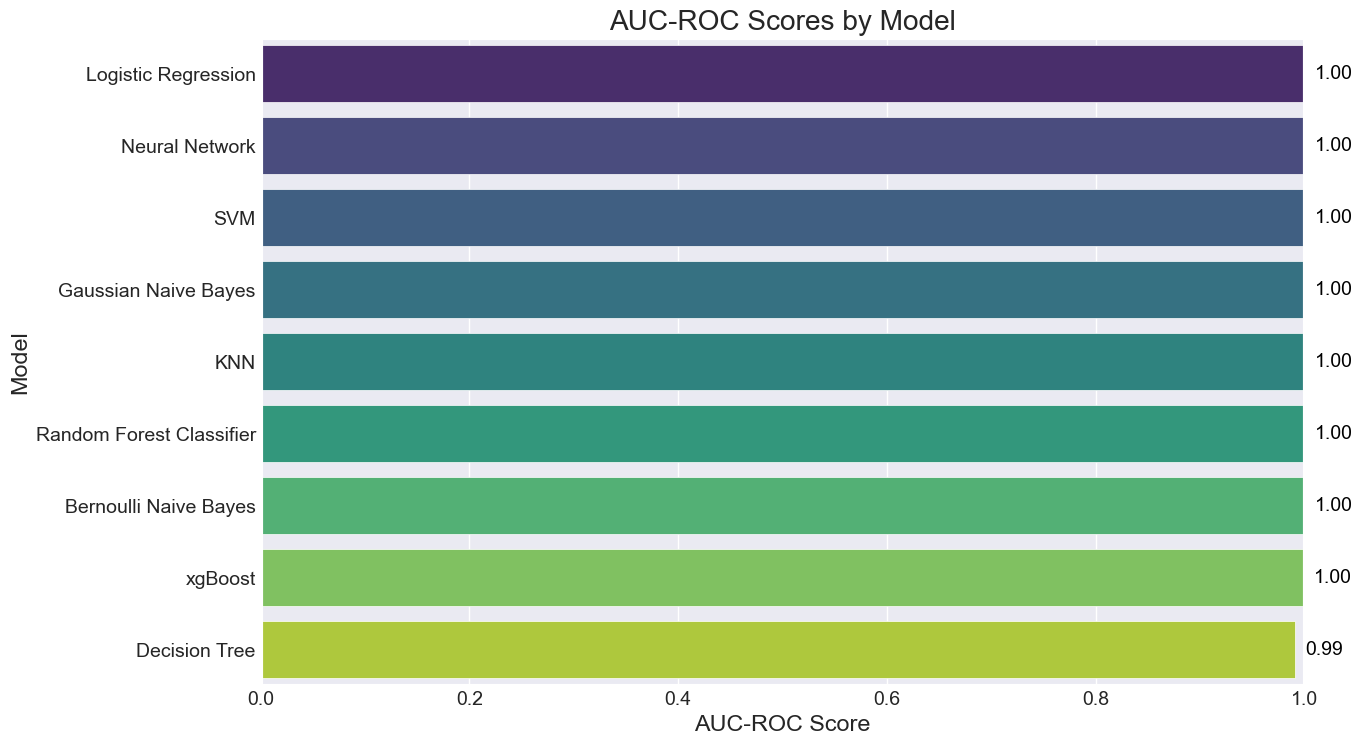

In [66]:
X = X_train  
y = y_train

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Neural Network', 'model': MLPClassifier()},
    {'name': 'SVM', 'model': SVC(probability=True)},
    {'name': 'Gaussian Naive Bayes', 'model': GaussianNB()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
    {'name': 'Bernoulli Naive Bayes', 'model': BernoulliNB()},
    {'name': 'KNN', 'model': KNeighborsClassifier()},
    {'name': 'xgBoost', 'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss')},
    {'name': 'Random Forest Classifier', 'model': RandomForestClassifier()}
]

# Train models and calculate AUC-ROC
auc_roc_scores = []

for item in models:
    model = item['model']
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_roc_scores.append({'Model': item['name'], 'AUC-ROC Score': auc_score})

# Convert the results to a DataFrame and sort by AUC-ROC score
auc_roc_df = pd.DataFrame(auc_roc_scores)
auc_roc_df.sort_values(by='AUC-ROC Score', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='AUC-ROC Score', y='Model', data=auc_roc_df, palette='viridis')

# Adding data labels
for index, value in enumerate(auc_roc_df['AUC-ROC Score']):
    plt.text(value + 0.01, index, f'{value:.2f}', color='black', va='center')

plt.title('AUC-ROC Scores by Model')
plt.xlabel('AUC-ROC Score')
plt.ylabel('Model')
plt.xlim(0.0, 1.0)
plt.show()


We can see from the AUC ROC  of our models that they perform extremely well that is due to the overfiting of our models, and since we have to split the x_train and y_train the performance is lesser